## Import dependencies

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

## Read data

In [2]:
df_screening = pd.read_csv("../datasets/ligand_screening_with_descriptors.csv")

In [3]:
df_screening

,ligand_entry,SMILES,ligand_type,exp_yield,exp_ee,exp_deldelG,nbo_O1_cmc,nbo_C2_cmc,nbo_X3_cmc,nbo_C4_cmc,...,nbo_C6_fl,nbo_C7_fl,nbo_O8_fl,da_C2_X3_C4_N5_fl,s_C2_Bmin_fl,s_C2_Bmax_fl,s_C2_L_fl,s_C6_Bmin_fl,s_C6_Bmax_fl,s_C6_L_fl
0,EL1,O/C(C1=CC=CC=C1)=C\C2=N[C@@H](C3=CC=CC=C3)CO2,enol,38,51,-0.767382,-0.59364,0.45158,-0.46876,0.57509,...,-0.10286,-0.08133,-0.46983,1.361,2.01,5.51,6.40,2.19,9.17,6.45
1,EL2,OC(/C=C/C1=CC=CC=C1)=C\C2=N[C@@H](C3=CC=CC=C3)CO2,enol,15,59,-0.924118,-0.60208,0.41875,-0.45450,0.56917,...,-0.10380,-0.08142,-0.46985,0.911,2.11,5.36,8.55,2.24,11.37,6.45
2,AL1,O/C(C1=C(C)C=C(C)C=C1C)=N\C2=N[C@@H](C3=CC=CC=...,amide,53,58,-0.903386,-0.58734,0.64705,-0.60709,0.72135,...,-0.09850,-0.08365,-0.45507,1.036,2.27,5.86,7.45,2.40,10.72,6.45
3,AL2,O/C(C1=CC(OC)=C(OC)C(OC)=C1)=N\C2=N[C@@H](C3=C...,amide,29,44,-0.643971,-0.58789,0.63645,-0.60574,0.72121,...,-0.09782,-0.08018,-0.45545,0.535,2.88,5.41,8.35,2.41,10.39,6.45
4,AL3,O/C(C1=CC(C)=CC(C)=C1)=N\C2=N[C@@H](C3=CC=CC=C...,amide,23,59,-0.924118,-0.58384,0.63659,-0.60136,0.72176,...,-0.09814,-0.08013,-0.45482,0.340,2.19,5.36,6.45,2.32,9.98,6.45
5,AL4,O/C(C1=CC(C(C)(C)C)=CC(C(C)(C)C)=C1)=N\C2=N[C@...,amide,60,60,-0.945230,-0.58421,0.63998,-0.60274,0.72234,...,-0.09796,-0.08009,-0.45529,0.554,3.26,5.73,7.45,2.46,11.31,6.45
6,AL5,O/C(C1=CC(C)=C(C)C=C1)=N\C2=N[C@@H](C3=CC=CC=C...,amide,48,59,-0.924118,-0.58473,0.63584,-0.60250,0.72194,...,-0.09806,-0.07995,-0.45536,0.322,2.07,5.34,7.45,2.20,9.81,6.45
7,AL6,O/C(C(C)(C)C)=N\C1=N[C@@H](C2=CC=CC=C2)CO1,amide,22,44,-0.643971,-0.58721,0.68823,-0.62275,0.72551,...,-0.09868,-0.08055,-0.45389,0.188,2.84,5.36,4.20,2.32,7.92,6.45
8,AL7,O/C(C1=CC(OC)=C(OC)C(OC)=C1)=N\C2=N[C@@H](C(C)...,amide,28,37,-0.529684,-0.58940,0.63483,-0.60285,0.72546,...,-0.07120,-0.08820,-0.45646,0.731,2.89,5.42,8.35,2.81,10.48,4.25
9,AL8,O/C(C(C)(C)C)=N\C1=N[C@@H](C2=CC=CC=C2)[C@@H](...,amide,18,48,-0.713182,-0.60055,0.68589,-0.61347,0.73008,...,-0.08354,0.07205,-0.45811,0.490,2.84,7.14,4.20,2.35,7.78,6.45


In [4]:
# Define non-feature columns
non_features = ['sl_no', 'ligand_entry', 'SMILES', 'ligand_type', 'source_project']

# Extract feature columns
feature_columns = [col for col in df_screening.columns if col not in non_features]

In [5]:
df = df_screening.copy() 

# Create a feature-only dataframe
features = df[feature_columns]

# dataset standardization
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# To first 5 PC transformations
pca = PCA(n_components=5, random_state=42)
pca_data = pca.fit_transform(features_scaled)

# Create a DataFrame for visualization
visualization_pca = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
visualization_pca['Ligand Type'] = df['ligand_type']
visualization_pca['Ligand Entry'] = df['ligand_entry']

Explained variance for top 5 PCs: [29.15374024 22.50905888 11.84738438 10.13293307  8.46037143]
Cumulative variance with top 5 PCs: [29.15374024 51.66279912 63.5101835  73.64311656 82.103488  ]


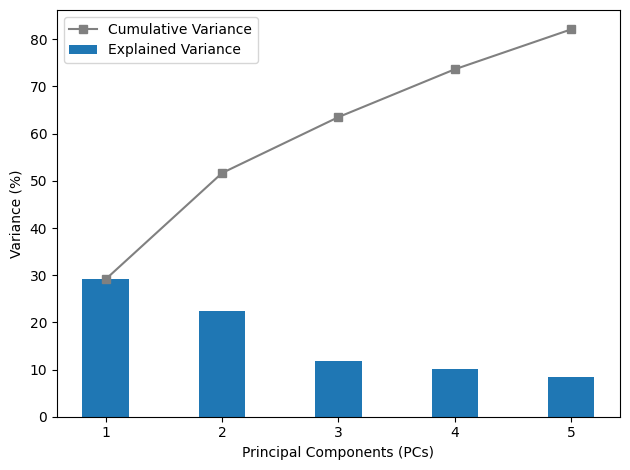

In [6]:
# Explained variance and cumulative variance
explained_variance = pca.explained_variance_ratio_ * 100  # for percentage
print(f"Explained variance for top 5 PCs: {explained_variance}")

cumulative_variance = np.cumsum(explained_variance)
print(f"Cumulative variance with top 5 PCs: {cumulative_variance}")

# Plot explained variance and cumulative variance
pcs = np.arange(1, len(explained_variance) + 1)

# Bar plot for explained variance
plt.bar(pcs, explained_variance, color="tab:blue", width = 0.4, label="Explained Variance")

# Line plot for cumulative variance
plt.plot(pcs, cumulative_variance, color="grey", marker='s', label="Cumulative Variance")

plt.xlabel("Principal Components (PCs)")
plt.ylabel("Variance (%)")
plt.xticks(pcs)
plt.legend()
plt.tight_layout()

plt.show()

In [7]:
# for assigning colors
color_dict = {
    'amide': '#0066b2',  
    'enol': '#40B5AD',   
    'urea': '#D22B2B',   
    'thiourea': 'orange' 
}

C:\Users\neera\anaconda3\envs\my-rdkit-env\lib\site-packages\ipykernel_launcher.py:10: UserWarning: 
The markers list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  # Remove the CWD from sys.path while we load stuff.


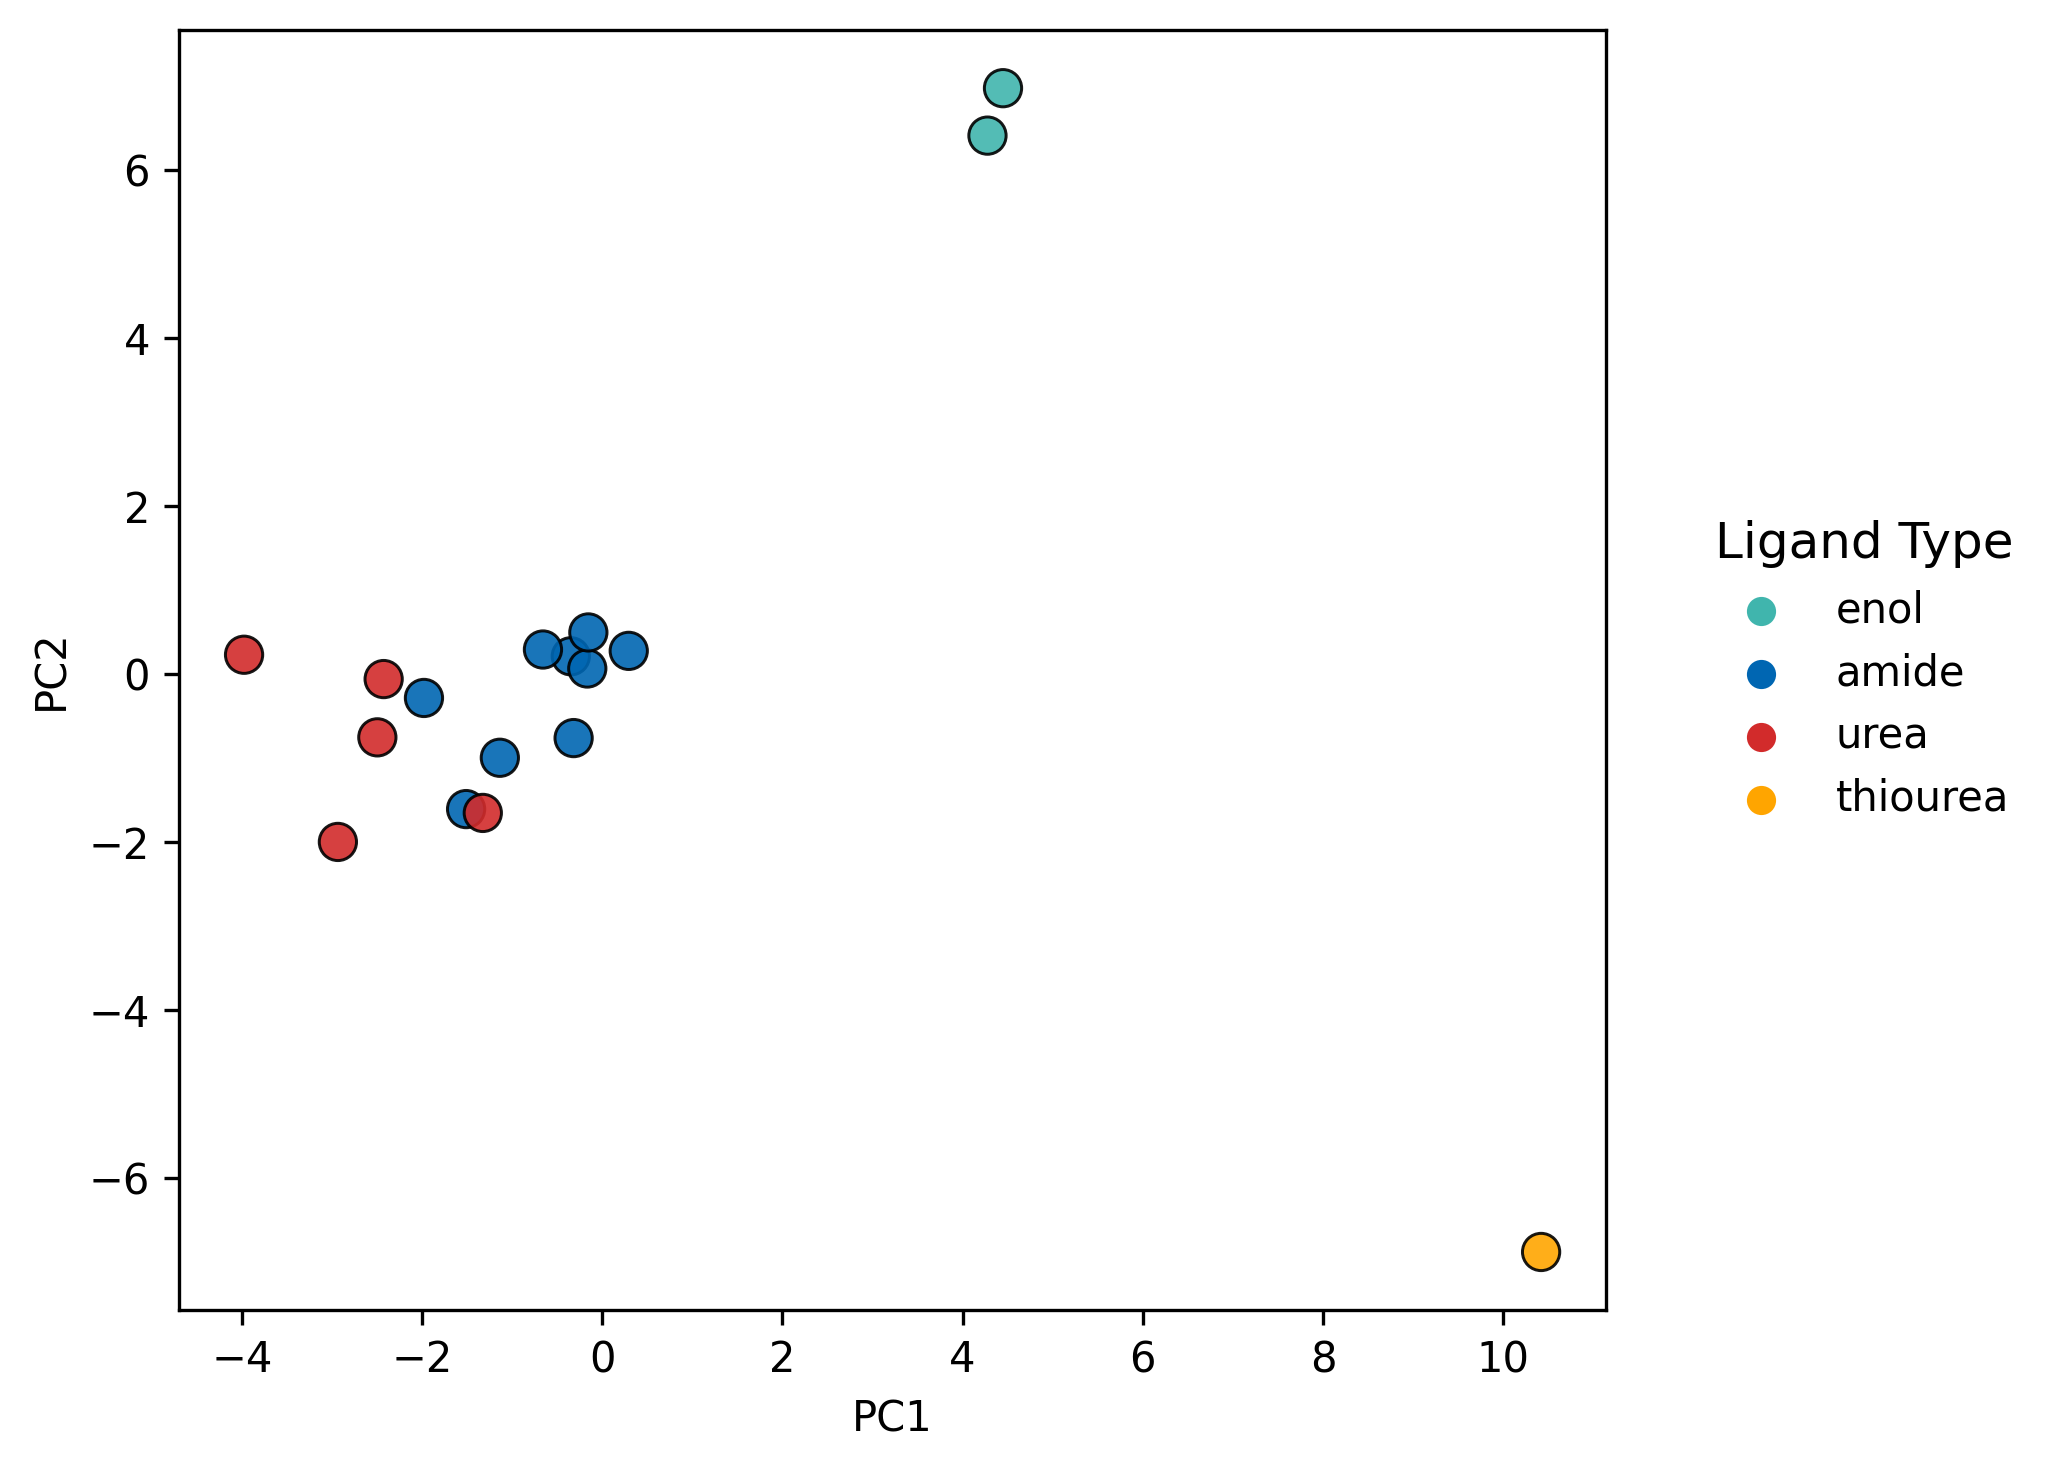

In [8]:
plt.figure(figsize=(7, 5), dpi=300) 
sns.scatterplot(
    data=visualization_pca,
    x='PC1', y='PC2',
    hue='Ligand Type',
    style='Ligand Type',
    markers='o',
    s=80, alpha=0.9,
    palette=color_dict,  
    edgecolor='black'    
)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Ligand Type", 
           fontsize=10, 
           title_fontsize=12, 
           loc='center left', 
           bbox_to_anchor=(1.05, 0.5),  
           frameon=False)

plt.grid(False)
plt.tight_layout()

plt.show()

C:\Users\neera\anaconda3\envs\my-rdkit-env\lib\site-packages\ipykernel_launcher.py:10: UserWarning: 
The markers list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  # Remove the CWD from sys.path while we load stuff.


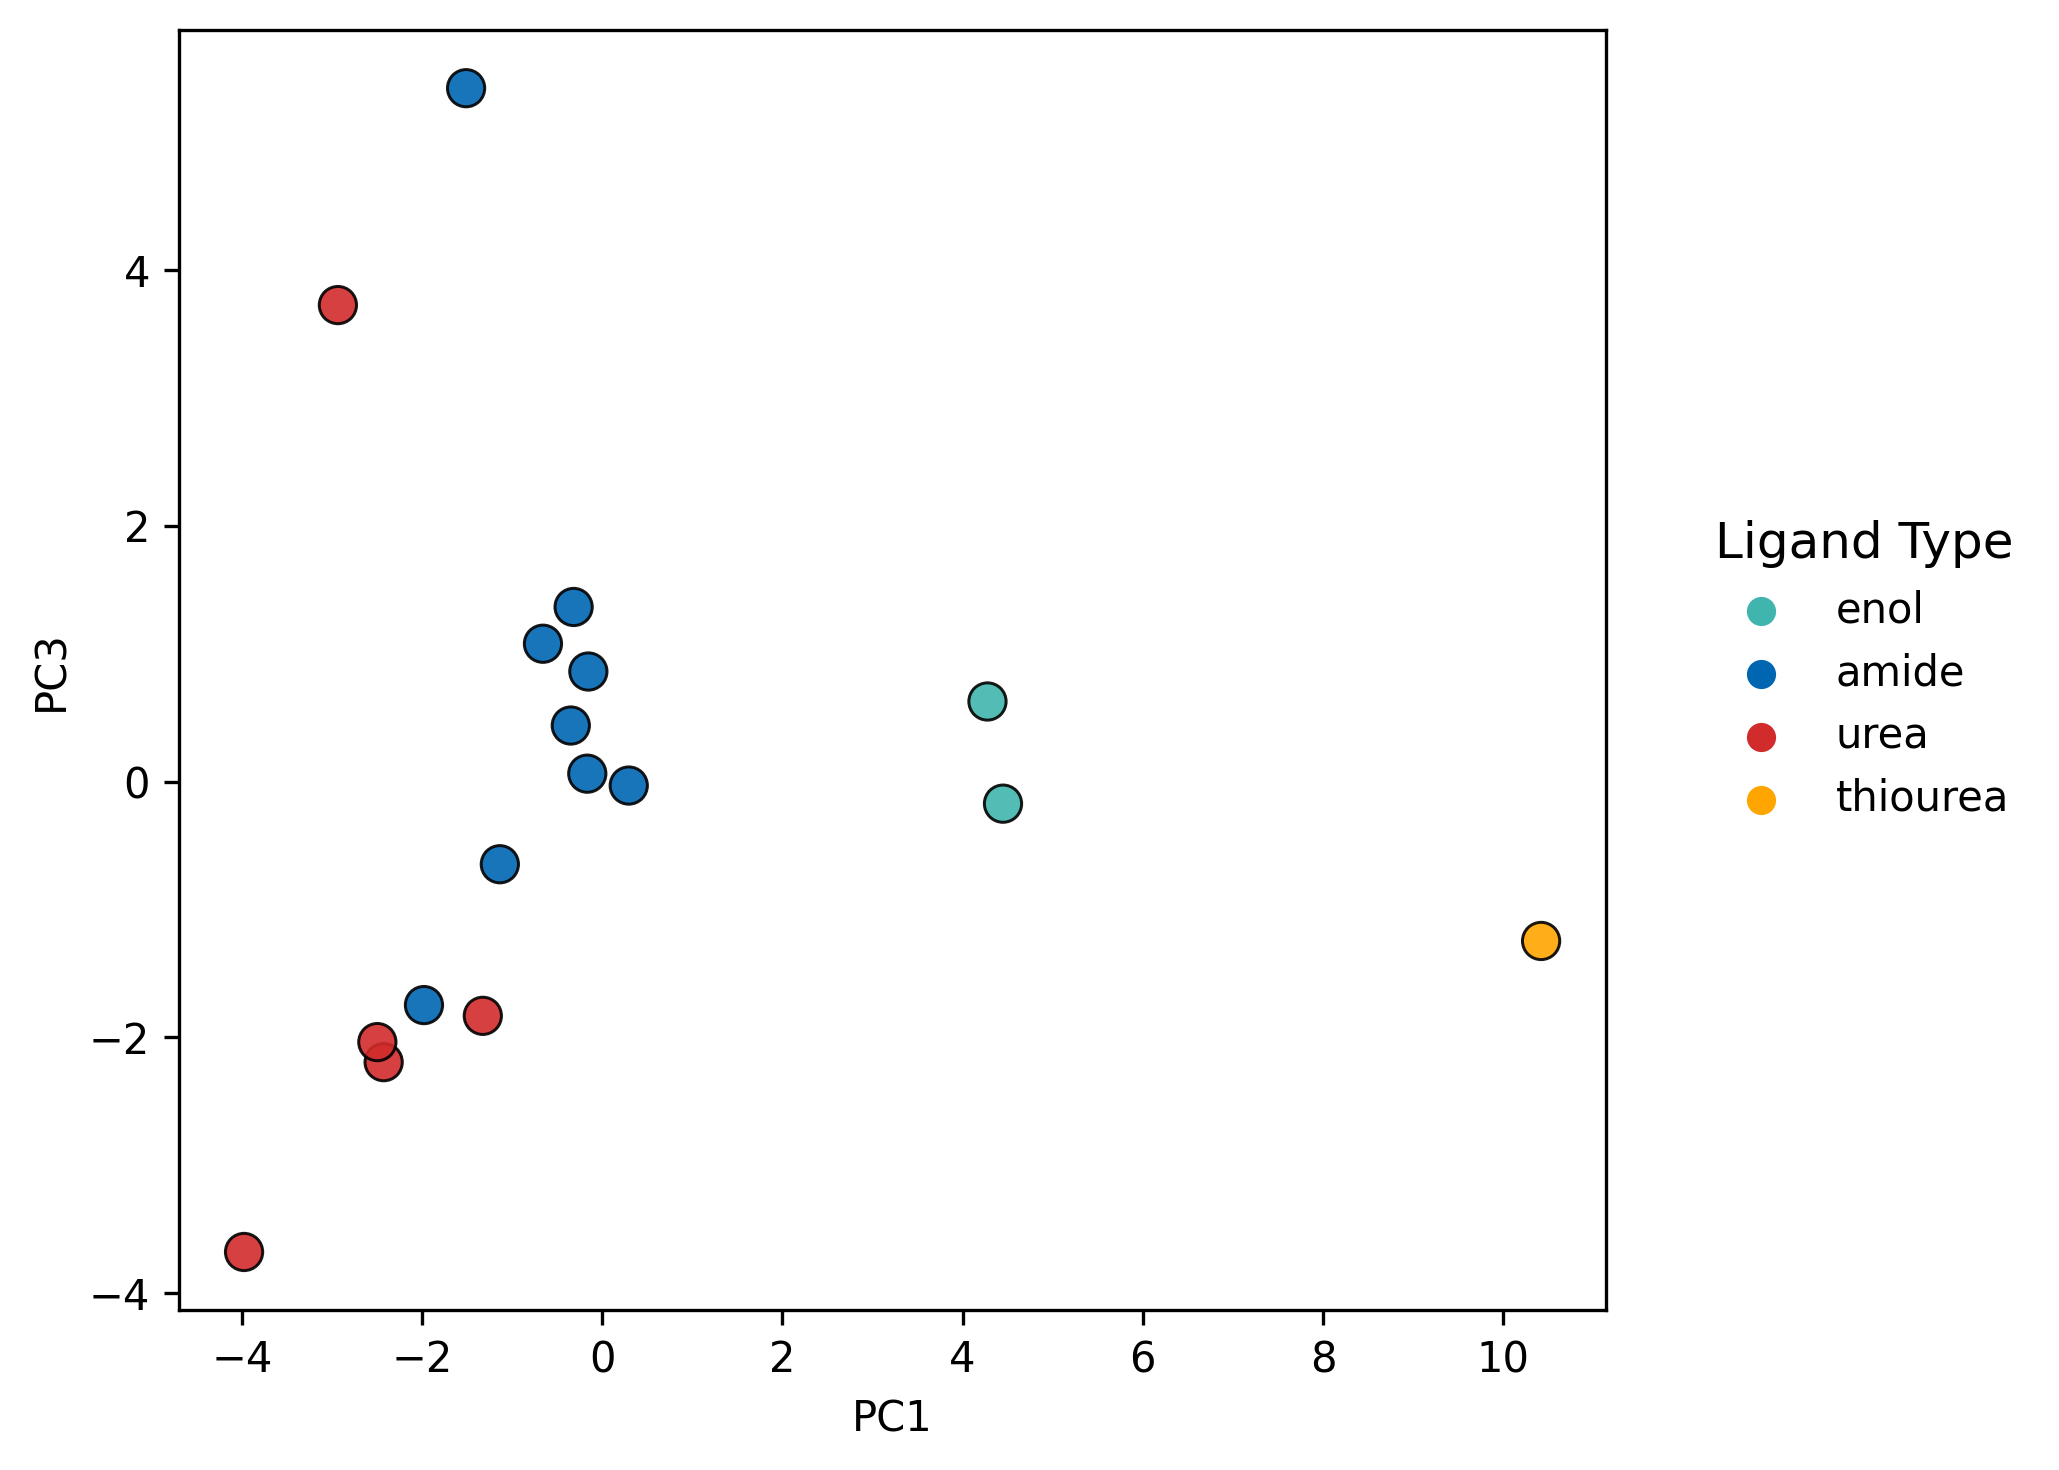

In [9]:
plt.figure(figsize=(7, 5), dpi=300)  
sns.scatterplot(
    data=visualization_pca,
    x='PC1', y='PC3',
    hue='Ligand Type',
    style='Ligand Type',
    markers='o',
    s=80, alpha=0.9,
    palette=color_dict,  
    edgecolor='black'    
)

plt.xlabel("PC1")
plt.ylabel("PC3")
plt.legend(title="Ligand Type", 
           fontsize=10, 
           title_fontsize=12, 
           loc='center left', 
           bbox_to_anchor=(1.05, 0.5),  
           frameon=False)

plt.grid(False)
plt.tight_layout()

plt.show()

In [10]:
# Feature type categorization
electronic_features = [col for col in feature_columns if 'nbo' in col]
geometric_features = [col for col in feature_columns if any(keyword in col for keyword in ['da', 'bl', 'ba'])]
steric_features = [col for col in feature_columns if any(keyword in col for keyword in ['s', 'vbur'])]
hybrid_features = [col for col in feature_columns if 'IE' in col]

In [11]:
# Create separate dataframes
electronic_df = df_screening[electronic_features].dropna() # all the electronic features
geometric_df = df_screening[geometric_features].dropna() # all the steric features
steric_df = df_screening[steric_features].dropna() # all the geometric features
hybrid_df = df_screening[hybrid_features].dropna() # only one feature (interaction energy-IE)

In [12]:
electronic_df

,nbo_O1_cmc,nbo_C2_cmc,nbo_X3_cmc,nbo_C4_cmc,nbo_N5_cmc,nbo_C6_cmc,nbo_C7_cmc,nbo_O8_cmc,nbo_Co_cmc,nbo_O/S1_fl,nbo_C2_fl,nbo_X3_fl,nbo_C4_fl,nbo_N5_fl,nbo_C6_fl,nbo_C7_fl,nbo_O8_fl
0,-0.59364,0.45158,-0.46876,0.57509,-0.39966,-0.09494,-0.08568,-0.44941,0.61886,-0.67270,0.42500,-0.43414,0.55149,-0.58057,-0.10286,-0.08133,-0.46983
1,-0.60208,0.41875,-0.45450,0.56917,-0.39834,-0.09542,-0.08570,-0.44891,0.62140,-0.67692,0.39502,-0.42067,0.54608,-0.57738,-0.10380,-0.08142,-0.46985
2,-0.58734,0.64705,-0.60709,0.72135,-0.41545,-0.09255,-0.08544,-0.44024,0.60924,-0.66481,0.65169,-0.58486,0.68861,-0.60622,-0.09850,-0.08365,-0.45507
3,-0.58789,0.63645,-0.60574,0.72121,-0.41929,-0.09253,-0.08500,-0.43968,0.61035,-0.66703,0.64443,-0.58811,0.69426,-0.61285,-0.09782,-0.08018,-0.45545
4,-0.58384,0.63659,-0.60136,0.72176,-0.41707,-0.09278,-0.08535,-0.43753,0.61119,-0.66547,0.64324,-0.58419,0.69383,-0.61191,-0.09814,-0.08013,-0.45482
5,-0.58421,0.63998,-0.60274,0.72234,-0.41740,-0.09271,-0.08530,-0.43787,0.61128,-0.66482,0.64654,-0.58687,0.69451,-0.61246,-0.09796,-0.08009,-0.45529
6,-0.58473,0.63584,-0.60250,0.72194,-0.41760,-0.09283,-0.08527,-0.43788,0.61140,-0.66566,0.64355,-0.58664,0.69386,-0.61314,-0.09806,-0.07995,-0.45536
7,-0.58721,0.68823,-0.62275,0.72551,-0.41875,-0.09254,-0.08559,-0.43666,0.61043,-0.67843,0.67835,-0.59429,0.69478,-0.60900,-0.09868,-0.08055,-0.45389
8,-0.58940,0.63483,-0.60285,0.72546,-0.42738,-0.06507,-0.09567,-0.43921,0.60572,-0.66963,0.64243,-0.58683,0.69325,-0.61710,-0.07120,-0.08820,-0.45646
9,-0.60055,0.68589,-0.61347,0.73008,-0.41442,-0.07869,0.07125,-0.44214,0.61299,-0.67694,0.68061,-0.59828,0.69577,-0.60746,-0.08354,0.07205,-0.45811


In [13]:
geometric_df

,da_C2_X3_C4_N5_cmc,bl_OCo_cmc,bl_NCo_cmc,ba_OCoN_cmc,da_C2_X3_C4_N5_fl
0,-0.195,1.87235,1.84139,94.504,1.361
1,-0.193,1.87329,1.84201,94.791,0.911
2,2.853,1.87732,1.83861,92.362,1.036
3,0.637,1.87806,1.84046,92.117,0.535
4,0.959,1.87866,1.84021,92.097,0.340
5,0.838,1.87824,1.84048,92.083,0.554
6,0.871,1.87889,1.84020,92.122,0.322
7,1.732,1.88116,1.84155,91.917,0.188
8,4.920,1.87656,1.84851,92.604,0.731
9,1.568,1.88364,1.83950,91.841,0.490


In [14]:
steric_df

,vbur_Co_cmc,vbur_oct2_cmc,vbur_oct3_cmc,vbur_oct4_cmc,vbur_oct5_cmc,vbur_oct6_cmc,vbur_oct7_cmc,s_C2_Bmin_fl,s_C2_Bmax_fl,s_C2_L_fl,s_C6_Bmin_fl,s_C6_Bmax_fl,s_C6_L_fl
0,72.68,2.4,2.6,6.7,7.7,4.0,8.1,2.01,5.51,6.40,2.19,9.17,6.45
1,72.57,2.0,3.0,7.1,7.2,4.0,8.0,2.11,5.36,8.55,2.24,11.37,6.45
2,73.39,2.1,3.9,6.7,7.4,4.1,8.0,2.27,5.86,7.45,2.40,10.72,6.45
3,72.20,2.1,2.7,6.9,7.4,3.9,7.9,2.88,5.41,8.35,2.41,10.39,6.45
4,72.19,2.0,2.6,6.7,7.5,4.1,8.0,2.19,5.36,6.45,2.32,9.98,6.45
5,72.20,2.2,2.5,6.5,7.8,4.0,7.9,3.26,5.73,7.45,2.46,11.31,6.45
6,72.15,2.4,2.2,6.5,8.0,3.8,8.1,2.07,5.34,7.45,2.20,9.81,6.45
7,72.23,2.5,2.4,6.4,8.0,3.8,7.8,2.84,5.36,4.20,2.32,7.92,6.45
8,71.95,1.9,2.8,6.9,7.5,4.4,7.5,2.89,5.42,8.35,2.81,10.48,4.25
9,72.42,2.4,3.4,7.1,7.3,3.8,7.2,2.84,7.14,4.20,2.35,7.78,6.45


## Principal component analysis

In [15]:
# Perform PCA for each feature type
pca_electronic = PCA(n_components=1)
pca_geometric = PCA(n_components=1)
pca_steric = PCA(n_components=1)
pca_hybrid = PCA(n_components=1) # only one PC exist for hybrid feature

In [16]:
# Calculate principal components
pc1_electronic = pca_electronic.fit_transform(electronic_df)
pc1_geometric = pca_geometric.fit_transform(geometric_df)
pc1_steric = pca_steric.fit_transform(steric_df)
pc1_hybrid = pca_hybrid.fit_transform(hybrid_df) # only one PC exist for hybrid feature

In [17]:
print(f"Explained variance for electronic PC1: {pca_electronic.explained_variance_ratio_ * 100}") # out of electronic features only
print(f"Explained variance for steric PC1: {pca_geometric.explained_variance_ratio_ * 100}") # out of geometric features only
print(f"Explained variance for geometric PC1: {pca_steric.explained_variance_ratio_ * 100}") # out of steric features only
# only one PC exist for hybrid feature

Explained variance for electronic PC1: [69.41366791]
Explained variance for steric PC1: [50.03960592]
Explained variance for geometric PC1: [47.4388588]


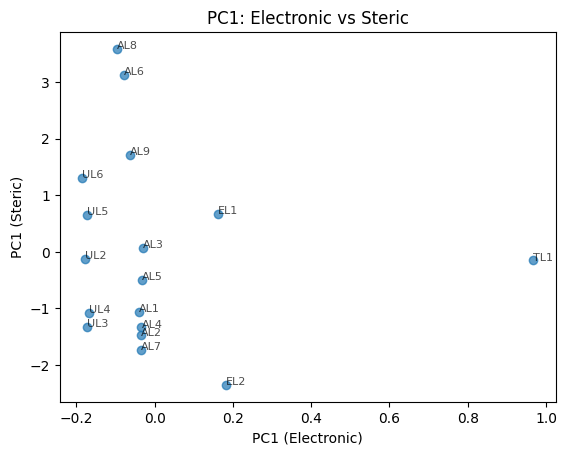

In [18]:
plt.scatter(pc1_electronic, pc1_steric, alpha=0.7, label='Ligands')

# Add labels to locate ligands
ligand_labels = df_screening.loc[electronic_df.index, 'ligand_entry'] 
for i, label in enumerate(ligand_labels):
    plt.text(pc1_electronic[i], pc1_steric[i], str(label), fontsize=8, alpha=0.7)

plt.xlabel('PC1 (Electronic)')
plt.ylabel('PC1 (Steric)')
plt.title('PC1: Electronic vs Steric')
plt.grid(False)
plt.show()

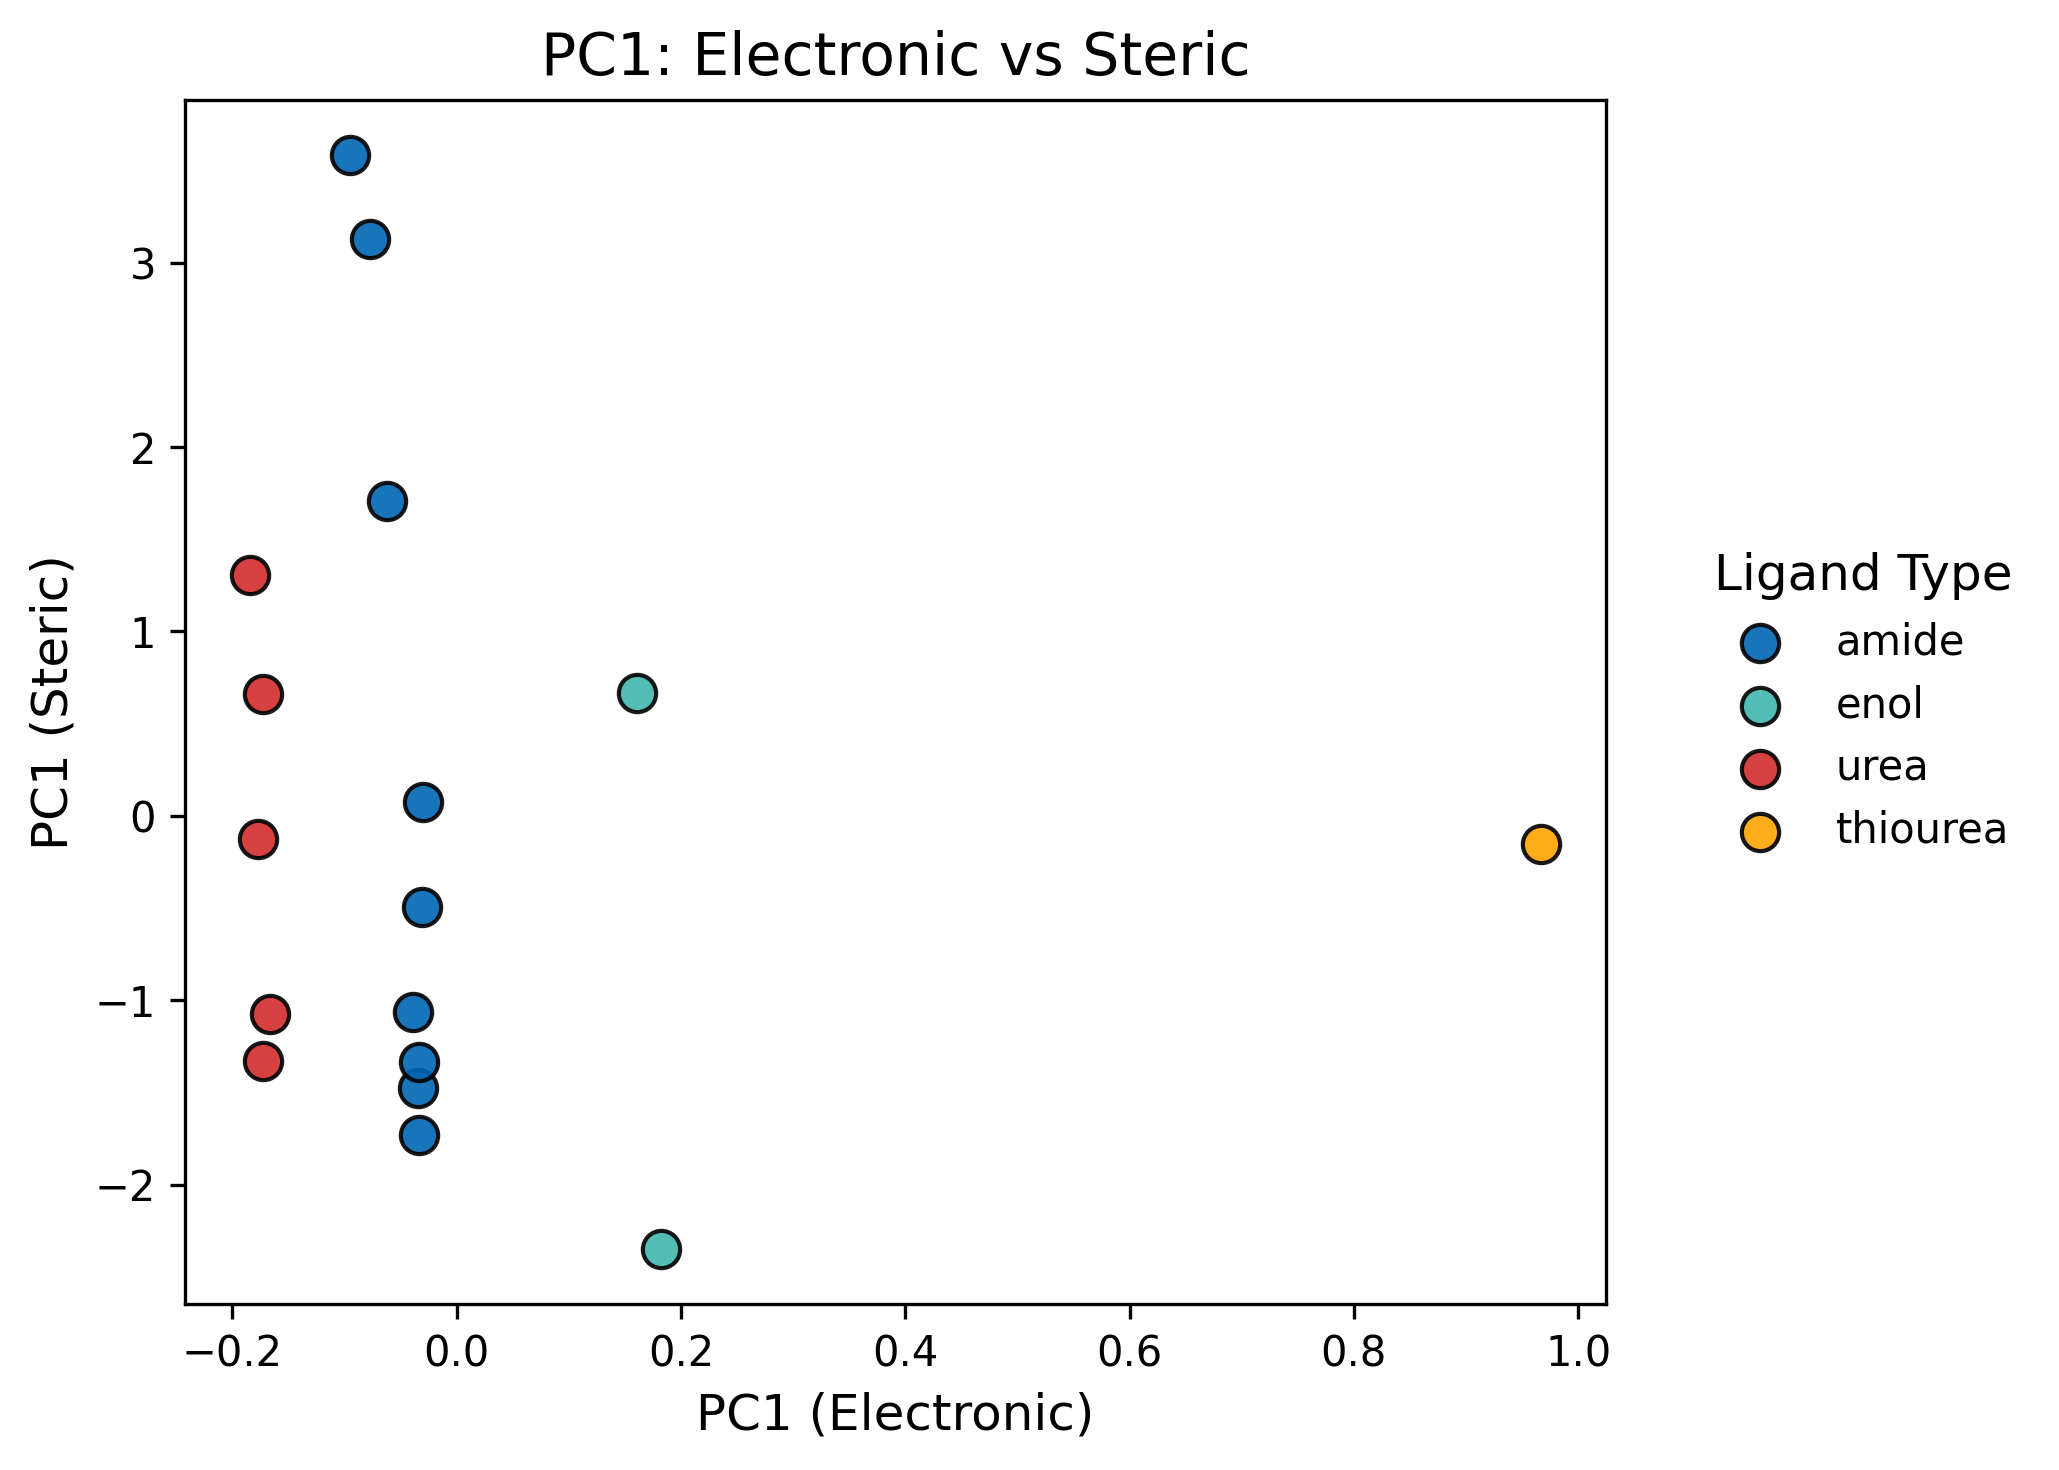

In [19]:
plt.figure(figsize=(7, 5), dpi=300)

# Extract ligand types for matching indices
ligand_types = df_screening.loc[electronic_df.index, 'ligand_type']  

# Scatter plot 
for lig_type, color in color_dict.items():
    type_indices = ligand_types == lig_type
    plt.scatter(
        pc1_electronic[type_indices], 
        pc1_steric[type_indices], 
        label=lig_type,
        c=color, 
        marker='o', 
        s=80, 
        alpha=0.9, 
        edgecolors='black'  
    )

plt.xlabel('PC1 (Electronic)', fontsize=12)
plt.ylabel('PC1 (Steric)', fontsize=12)
plt.title('PC1: Electronic vs Steric', fontsize=14)

plt.legend(
    title="Ligand Type", 
    fontsize=10, 
    title_fontsize=12, 
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5),  
    frameon=False  
)

plt.grid(False)
plt.tight_layout() 
plt.show()

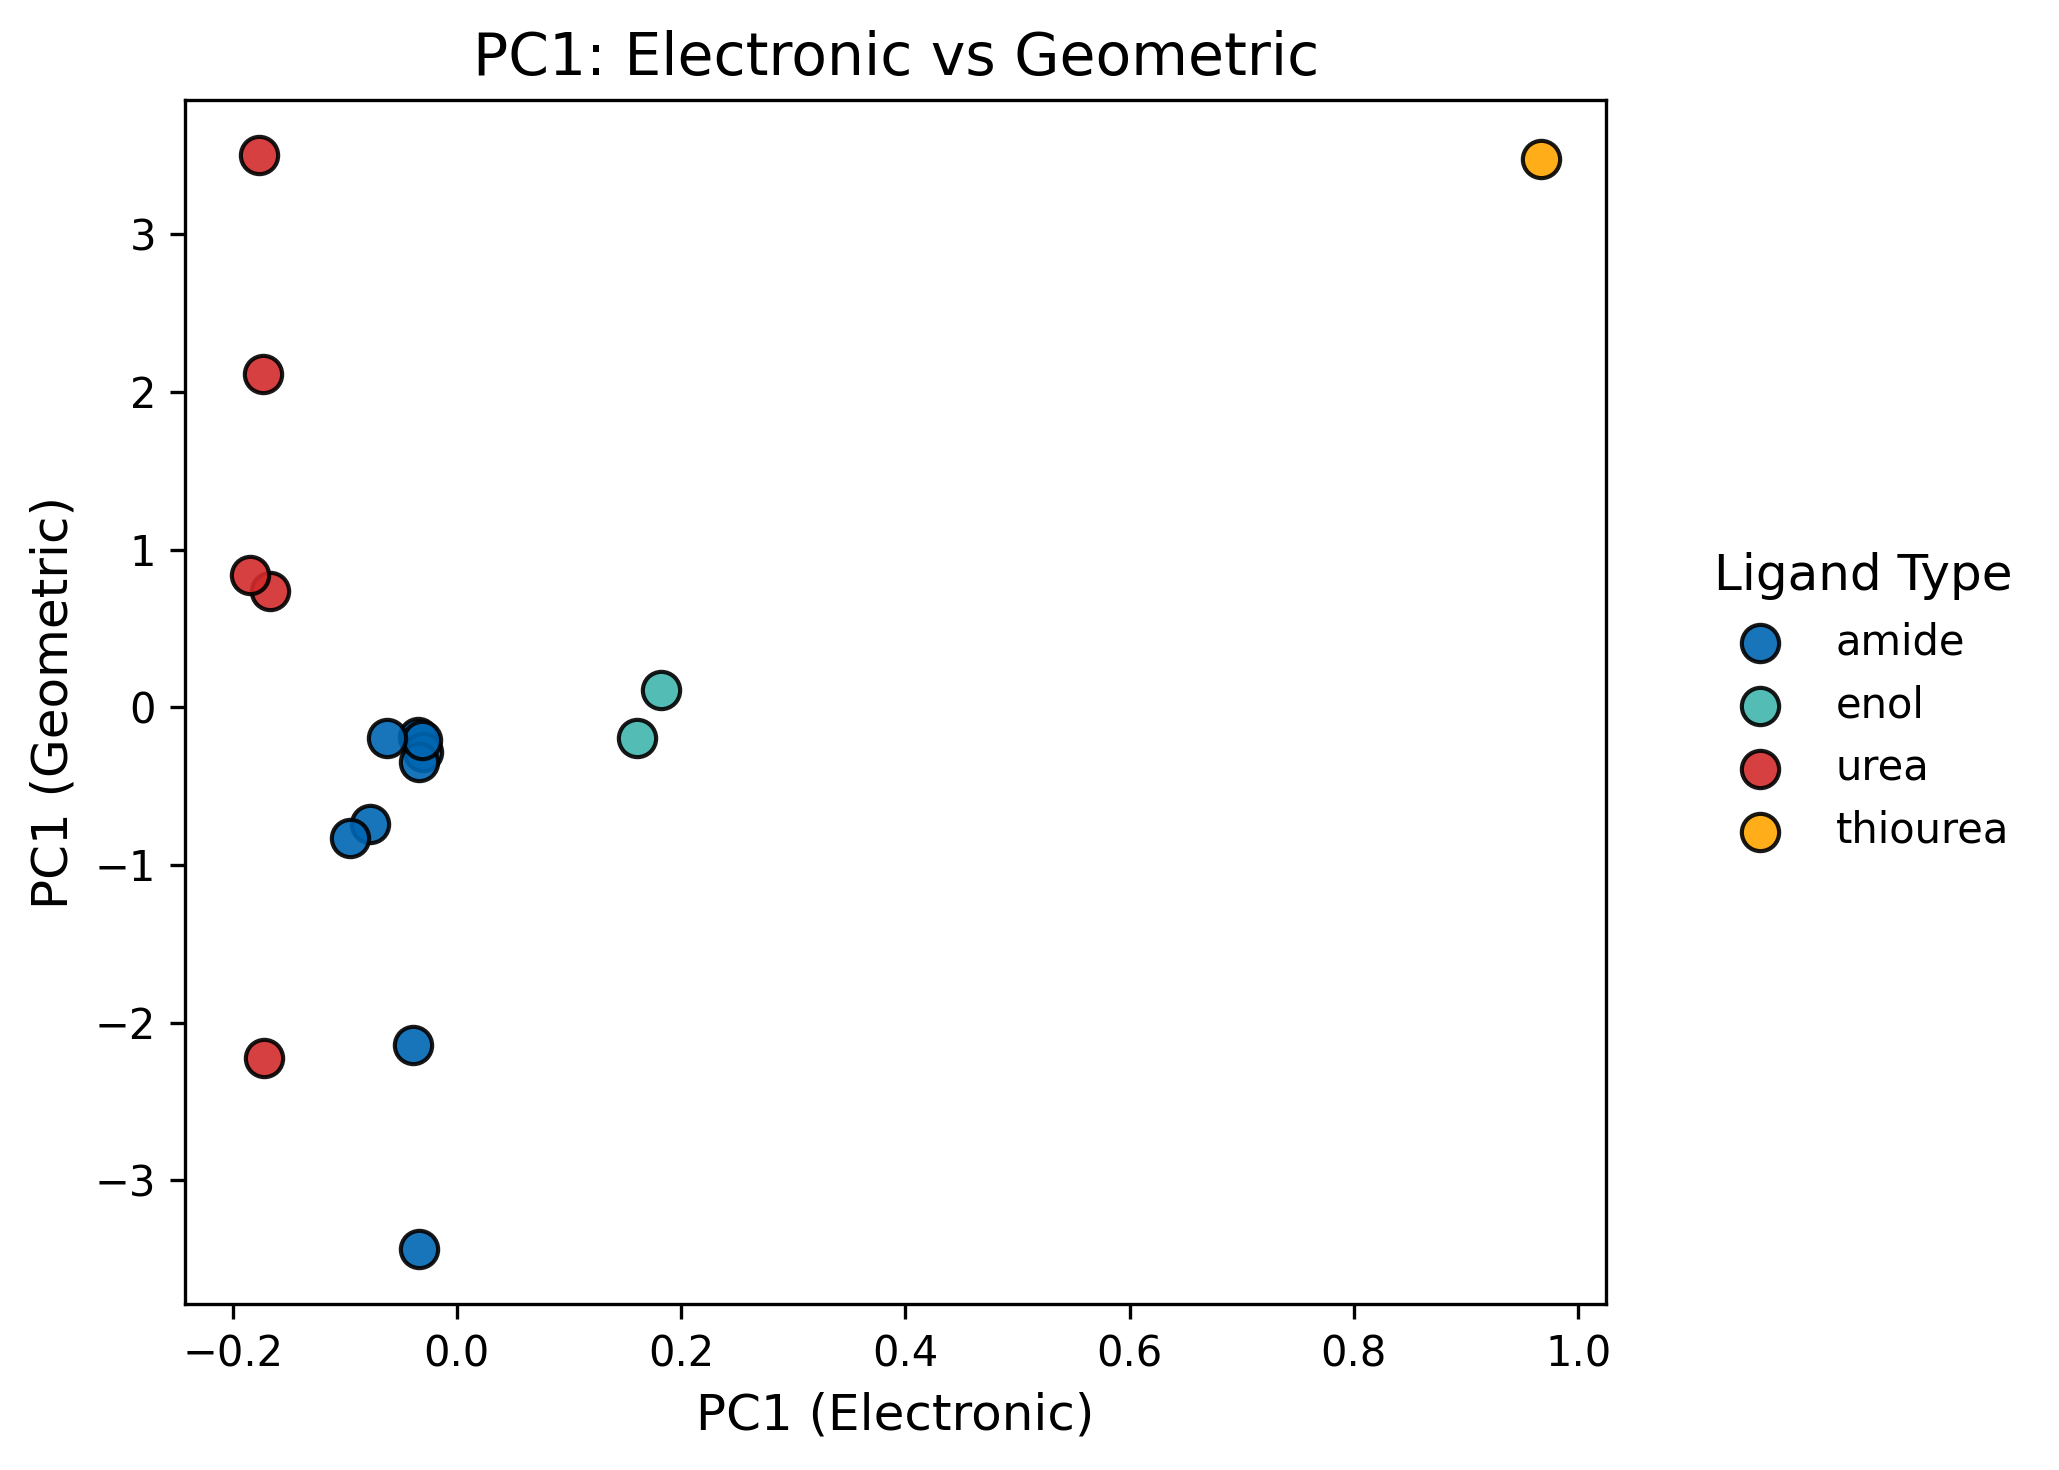

In [20]:
plt.figure(figsize=(7, 5), dpi=300)

for lig_type, color in color_dict.items():
    type_indices = ligand_types == lig_type
    plt.scatter(
        pc1_electronic[type_indices], 
        pc1_geometric[type_indices], 
        label=lig_type,
        c=color, 
        marker='o', 
        s=80, 
        alpha=0.9, 
        edgecolors='black' 
    )

plt.xlabel('PC1 (Electronic)', fontsize=12)
plt.ylabel('PC1 (Geometric)', fontsize=12)
plt.title('PC1: Electronic vs Geometric', fontsize=14)

plt.legend(
    title="Ligand Type", 
    fontsize=10, 
    title_fontsize=12, 
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5),  
    frameon=False 
)

plt.grid(False)
plt.tight_layout()  
plt.show()

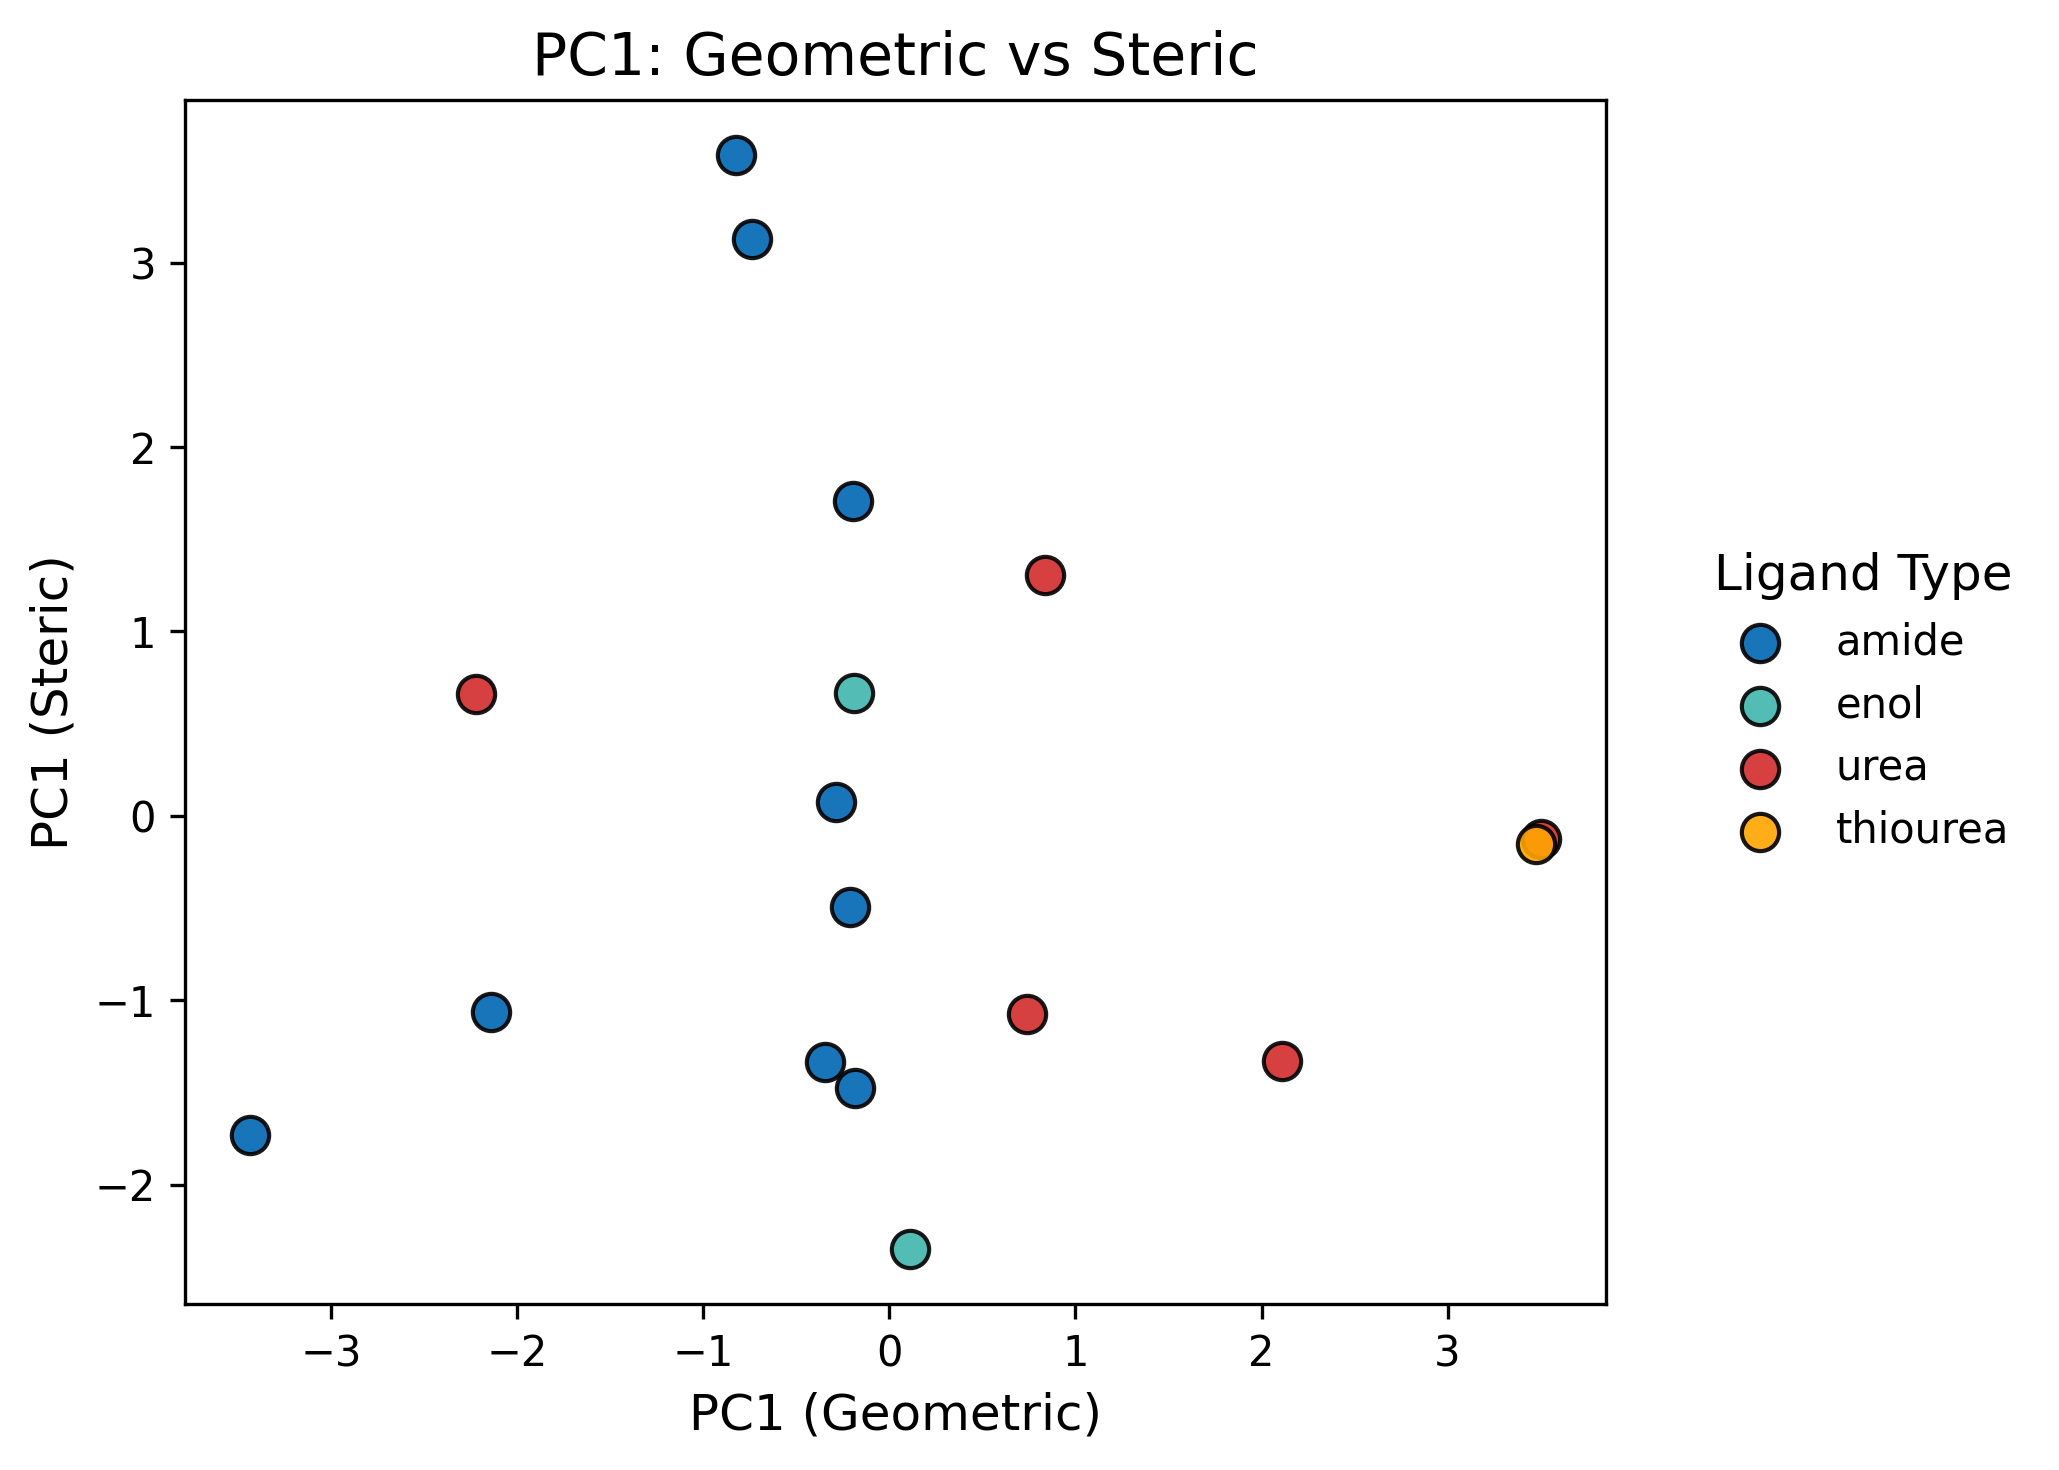

In [21]:
plt.figure(figsize=(7, 5), dpi=300)

for lig_type, color in color_dict.items():
    type_indices = ligand_types == lig_type
    plt.scatter(
        pc1_geometric[type_indices], 
        pc1_steric[type_indices], 
        label=lig_type,
        c=color, 
        marker='o', 
        s=80, 
        alpha=0.9, 
        edgecolors='black' 
    )


plt.xlabel('PC1 (Geometric)', fontsize=12)
plt.ylabel('PC1 (Steric)', fontsize=12)
plt.title('PC1: Geometric vs Steric', fontsize=14)


plt.legend(
    title="Ligand Type", 
    fontsize=10, 
    title_fontsize=12, 
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5), 
    frameon=False  
)

plt.grid(False)
plt.tight_layout()  
plt.show()

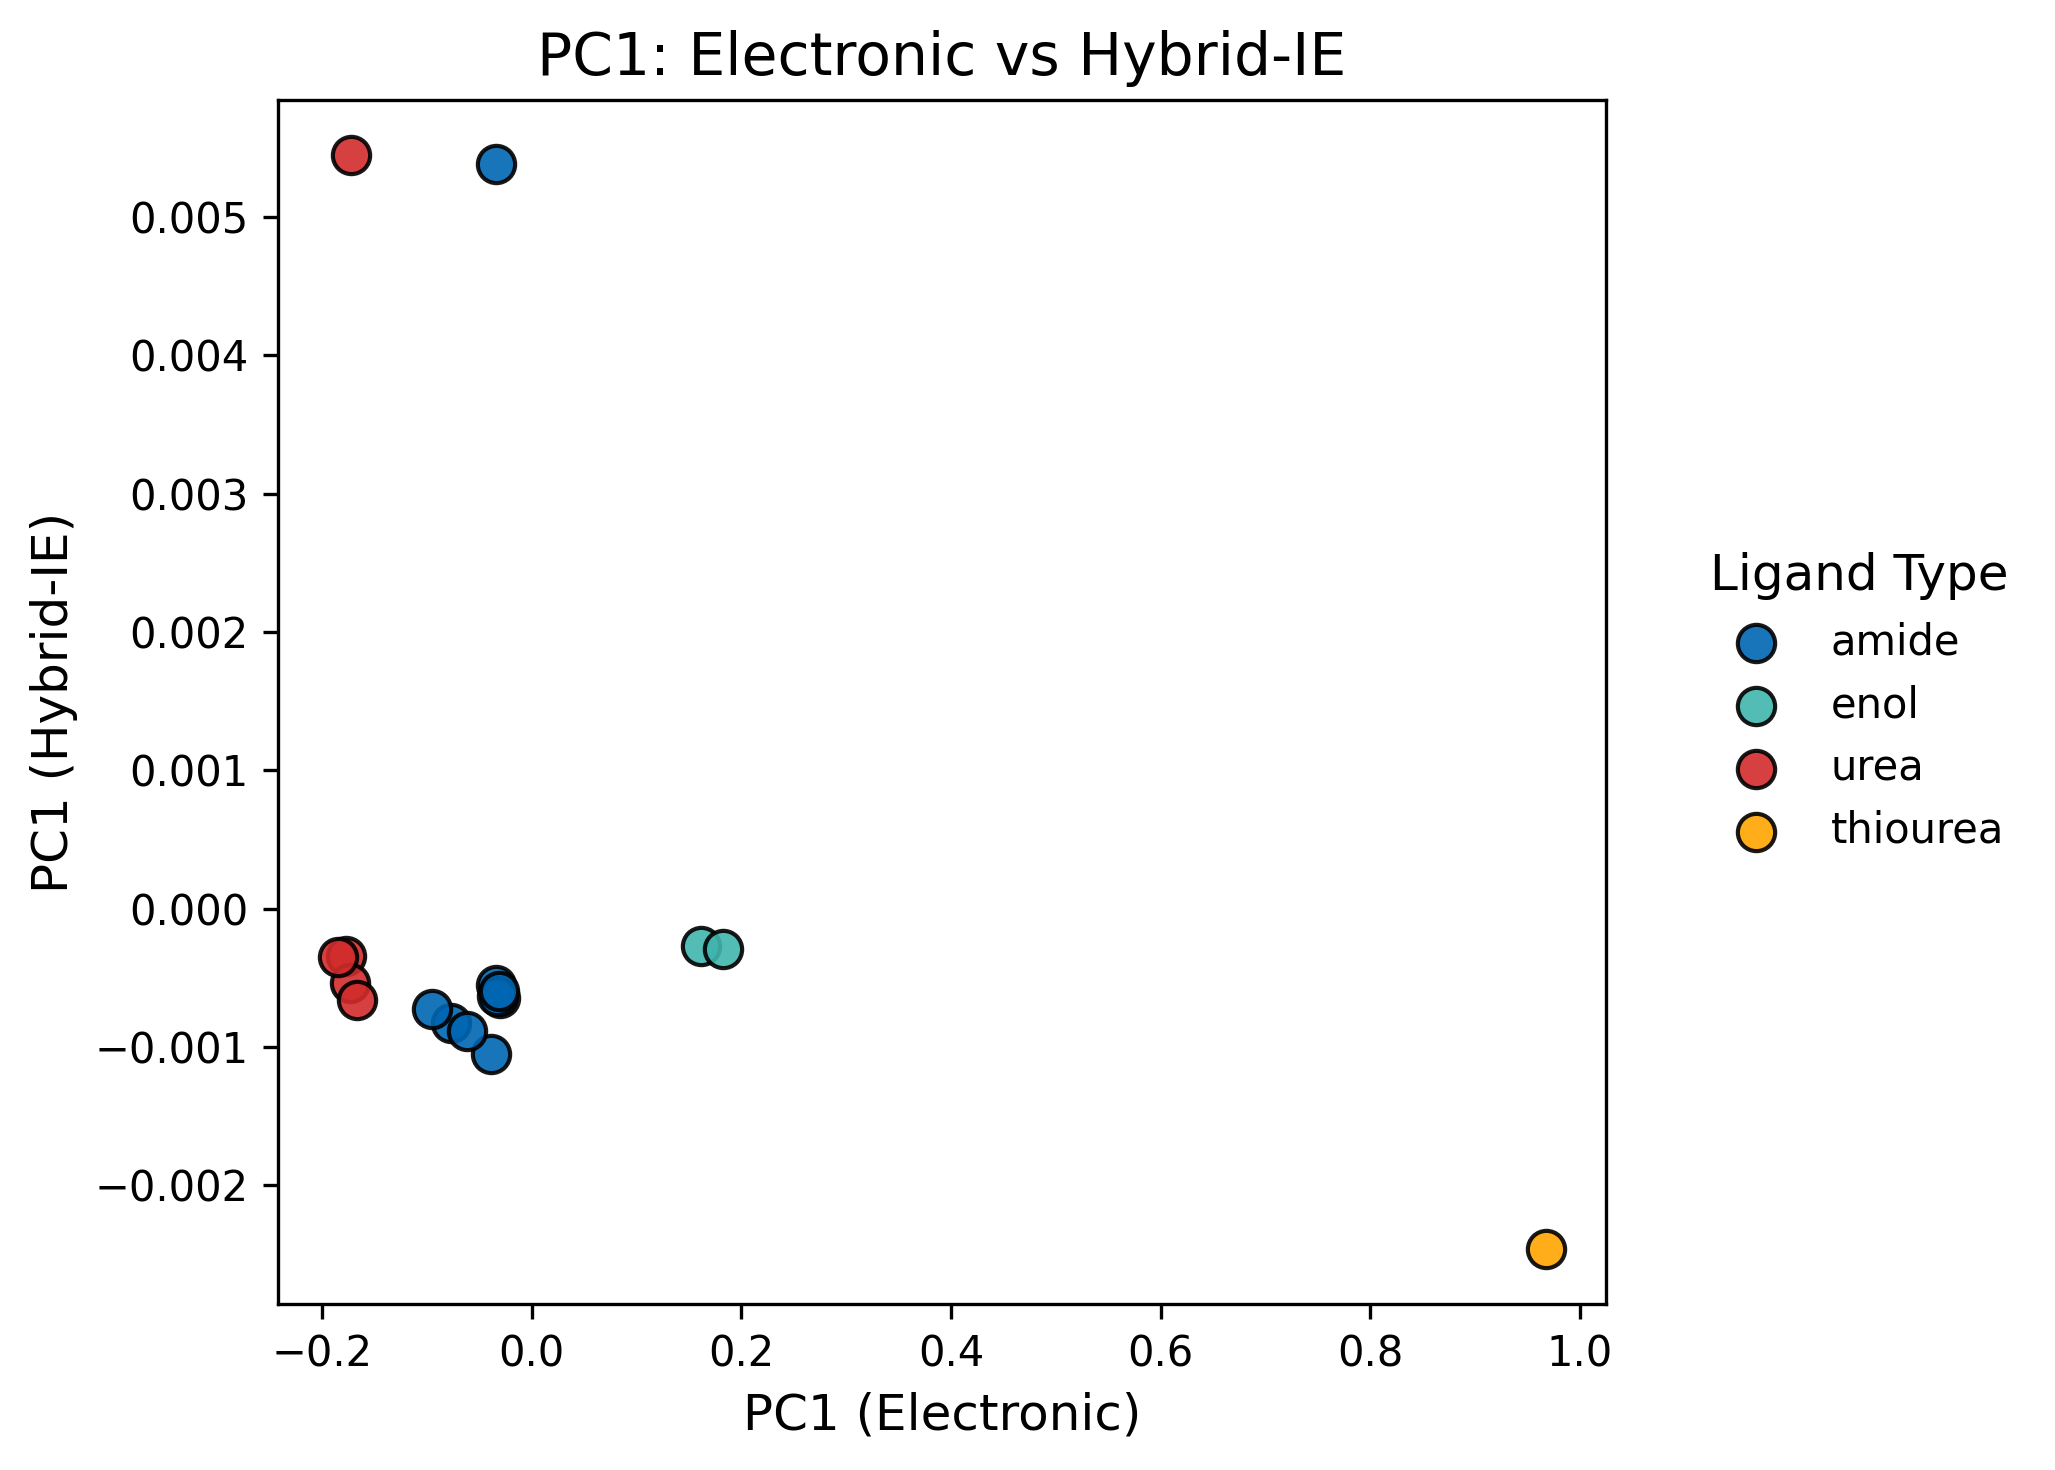

In [22]:
plt.figure(figsize=(7, 5), dpi=300)

for lig_type, color in color_dict.items():
    type_indices = ligand_types == lig_type
    plt.scatter(
        pc1_electronic[type_indices], 
        pc1_hybrid[type_indices], 
        label=lig_type,
        c=color, 
        marker='o', 
        s=80, 
        alpha=0.9, 
        edgecolors='black'  
    )


plt.xlabel('PC1 (Electronic)', fontsize=12)
plt.ylabel('PC1 (Hybrid-IE)', fontsize=12)
plt.title('PC1: Electronic vs Hybrid-IE', fontsize=14)


plt.legend(
    title="Ligand Type", 
    fontsize=10, 
    title_fontsize=12, 
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5),  
    frameon=False  
)

plt.grid(False)
plt.tight_layout()  
plt.show()

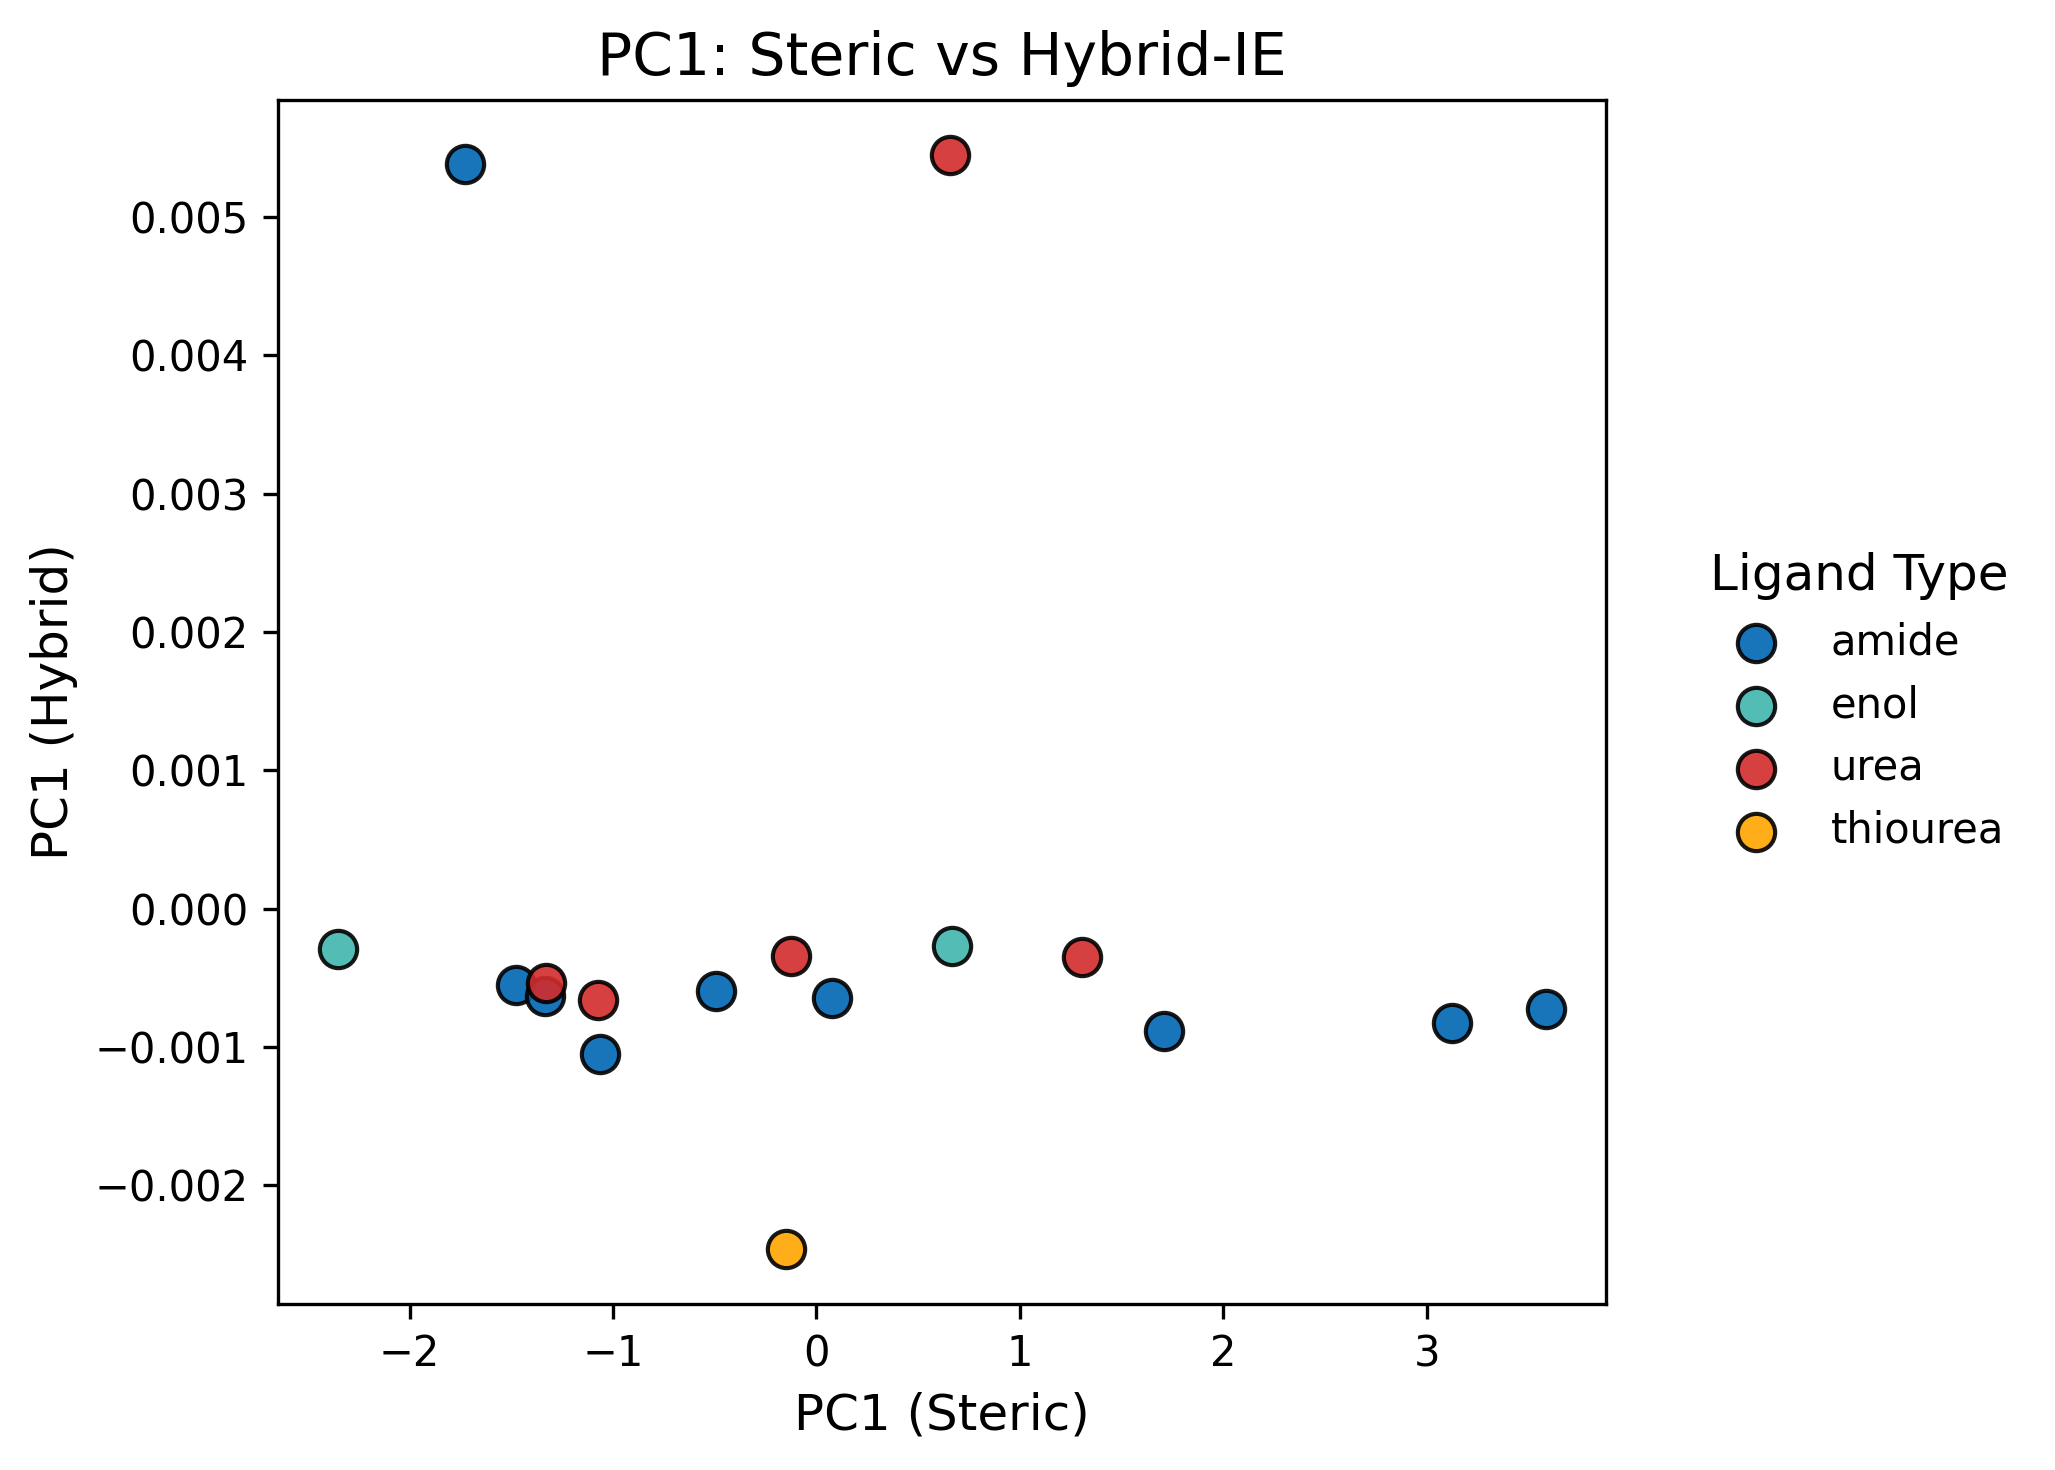

In [23]:
plt.figure(figsize=(7, 5), dpi=300)

for lig_type, color in color_dict.items():
    type_indices = ligand_types == lig_type
    plt.scatter(
        pc1_steric[type_indices], 
        pc1_hybrid[type_indices], 
        label=lig_type,
        c=color, 
        marker='o', 
        s=80, 
        alpha=0.9, 
        edgecolors='black' 
    )

# Plot details
plt.xlabel('PC1 (Steric)', fontsize=12)
plt.ylabel('PC1 (Hybrid)', fontsize=12)
plt.title('PC1: Steric vs Hybrid-IE', fontsize=14)


plt.legend(
    title="Ligand Type", 
    fontsize=10, 
    title_fontsize=12, 
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5), 
    frameon=False  
)

plt.grid(False)
plt.tight_layout() 
plt.show()

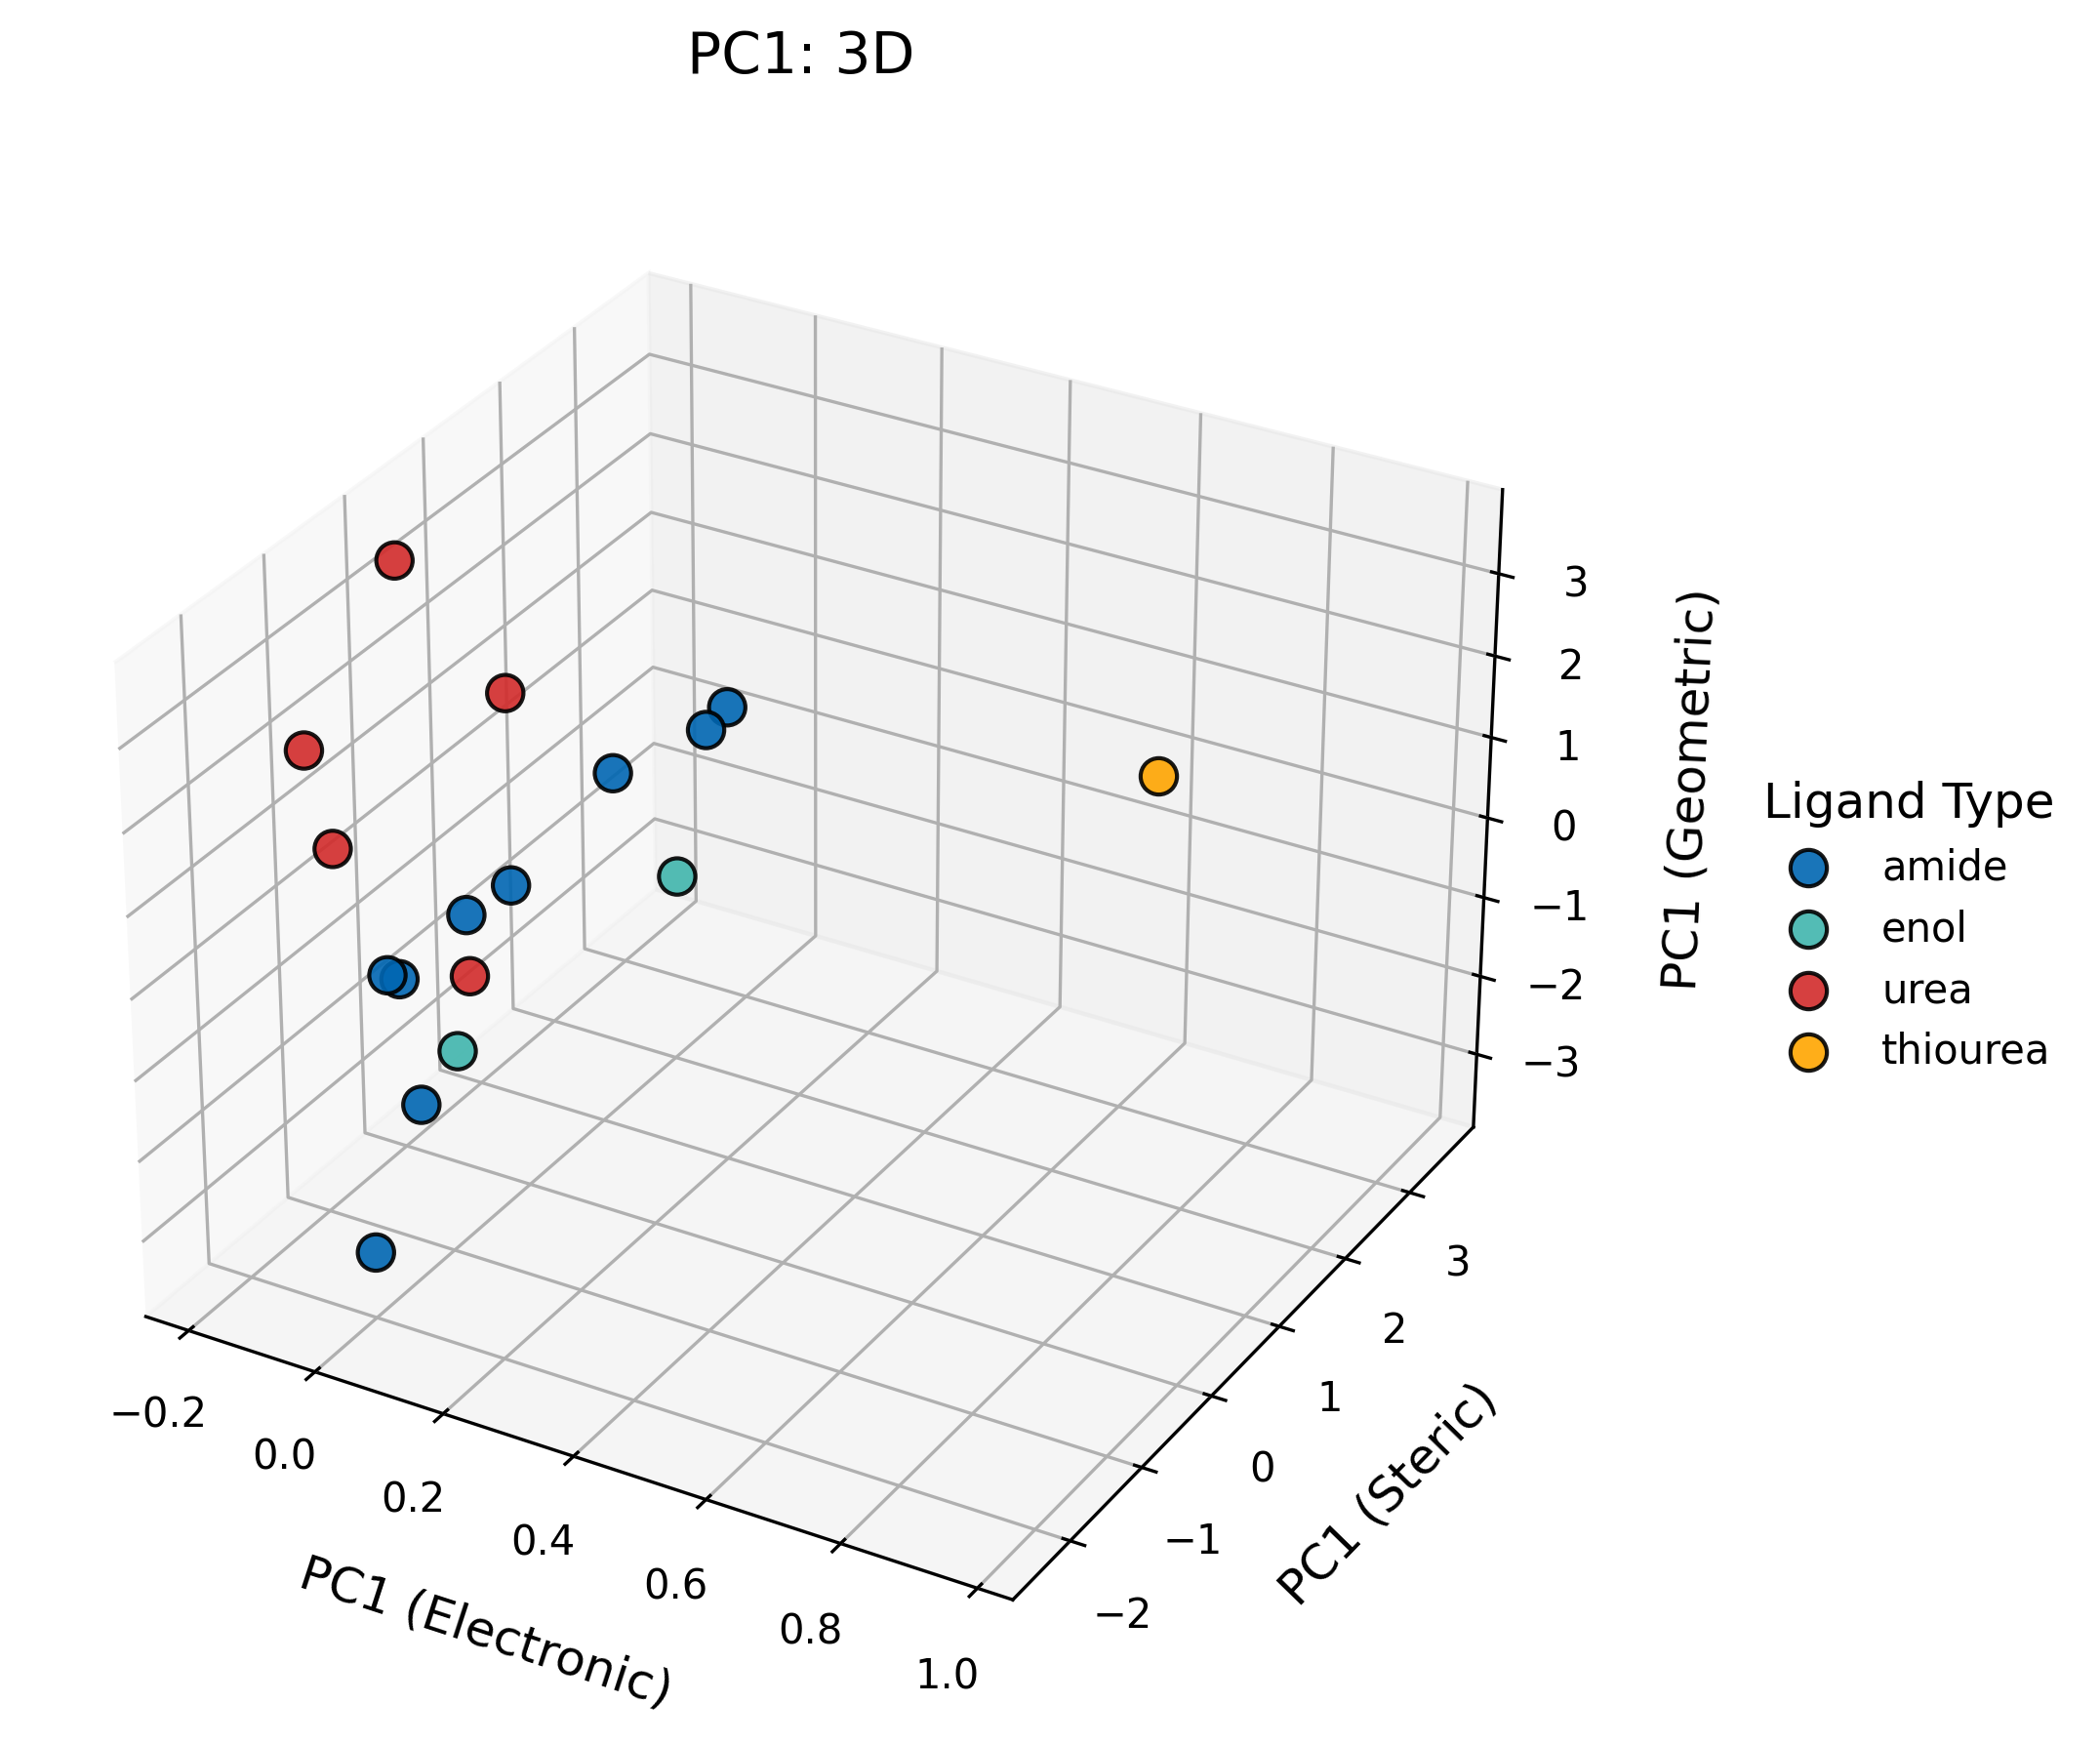

In [24]:
fig = plt.figure(figsize=(8, 6), dpi=300)
ax = fig.add_subplot(111, projection='3d')

for lig_type, color in color_dict.items():
    type_indices = ligand_types == lig_type
    ax.scatter(
        pc1_electronic[type_indices], 
        pc1_steric[type_indices], 
        pc1_geometric[type_indices], 
        label=lig_type,
        c=color, 
        marker='o', 
        s=80, 
        alpha=0.9, 
        edgecolors='black'  
    )

ax.set_xlabel('PC1 (Electronic)', fontsize=12, labelpad=10)
ax.set_ylabel('PC1 (Steric)', fontsize=12, labelpad=10)
ax.set_zlabel('PC1 (Geometric)', fontsize=12, labelpad=10)
ax.set_title('PC1: 3D', fontsize=14, pad=20)

ax.legend(
    title="Ligand Type", 
    fontsize=10, 
    title_fontsize=12, 
    loc='center left', 
    bbox_to_anchor=(1.1, 0.5),  
    frameon=False  
)

plt.tight_layout()
plt.show()

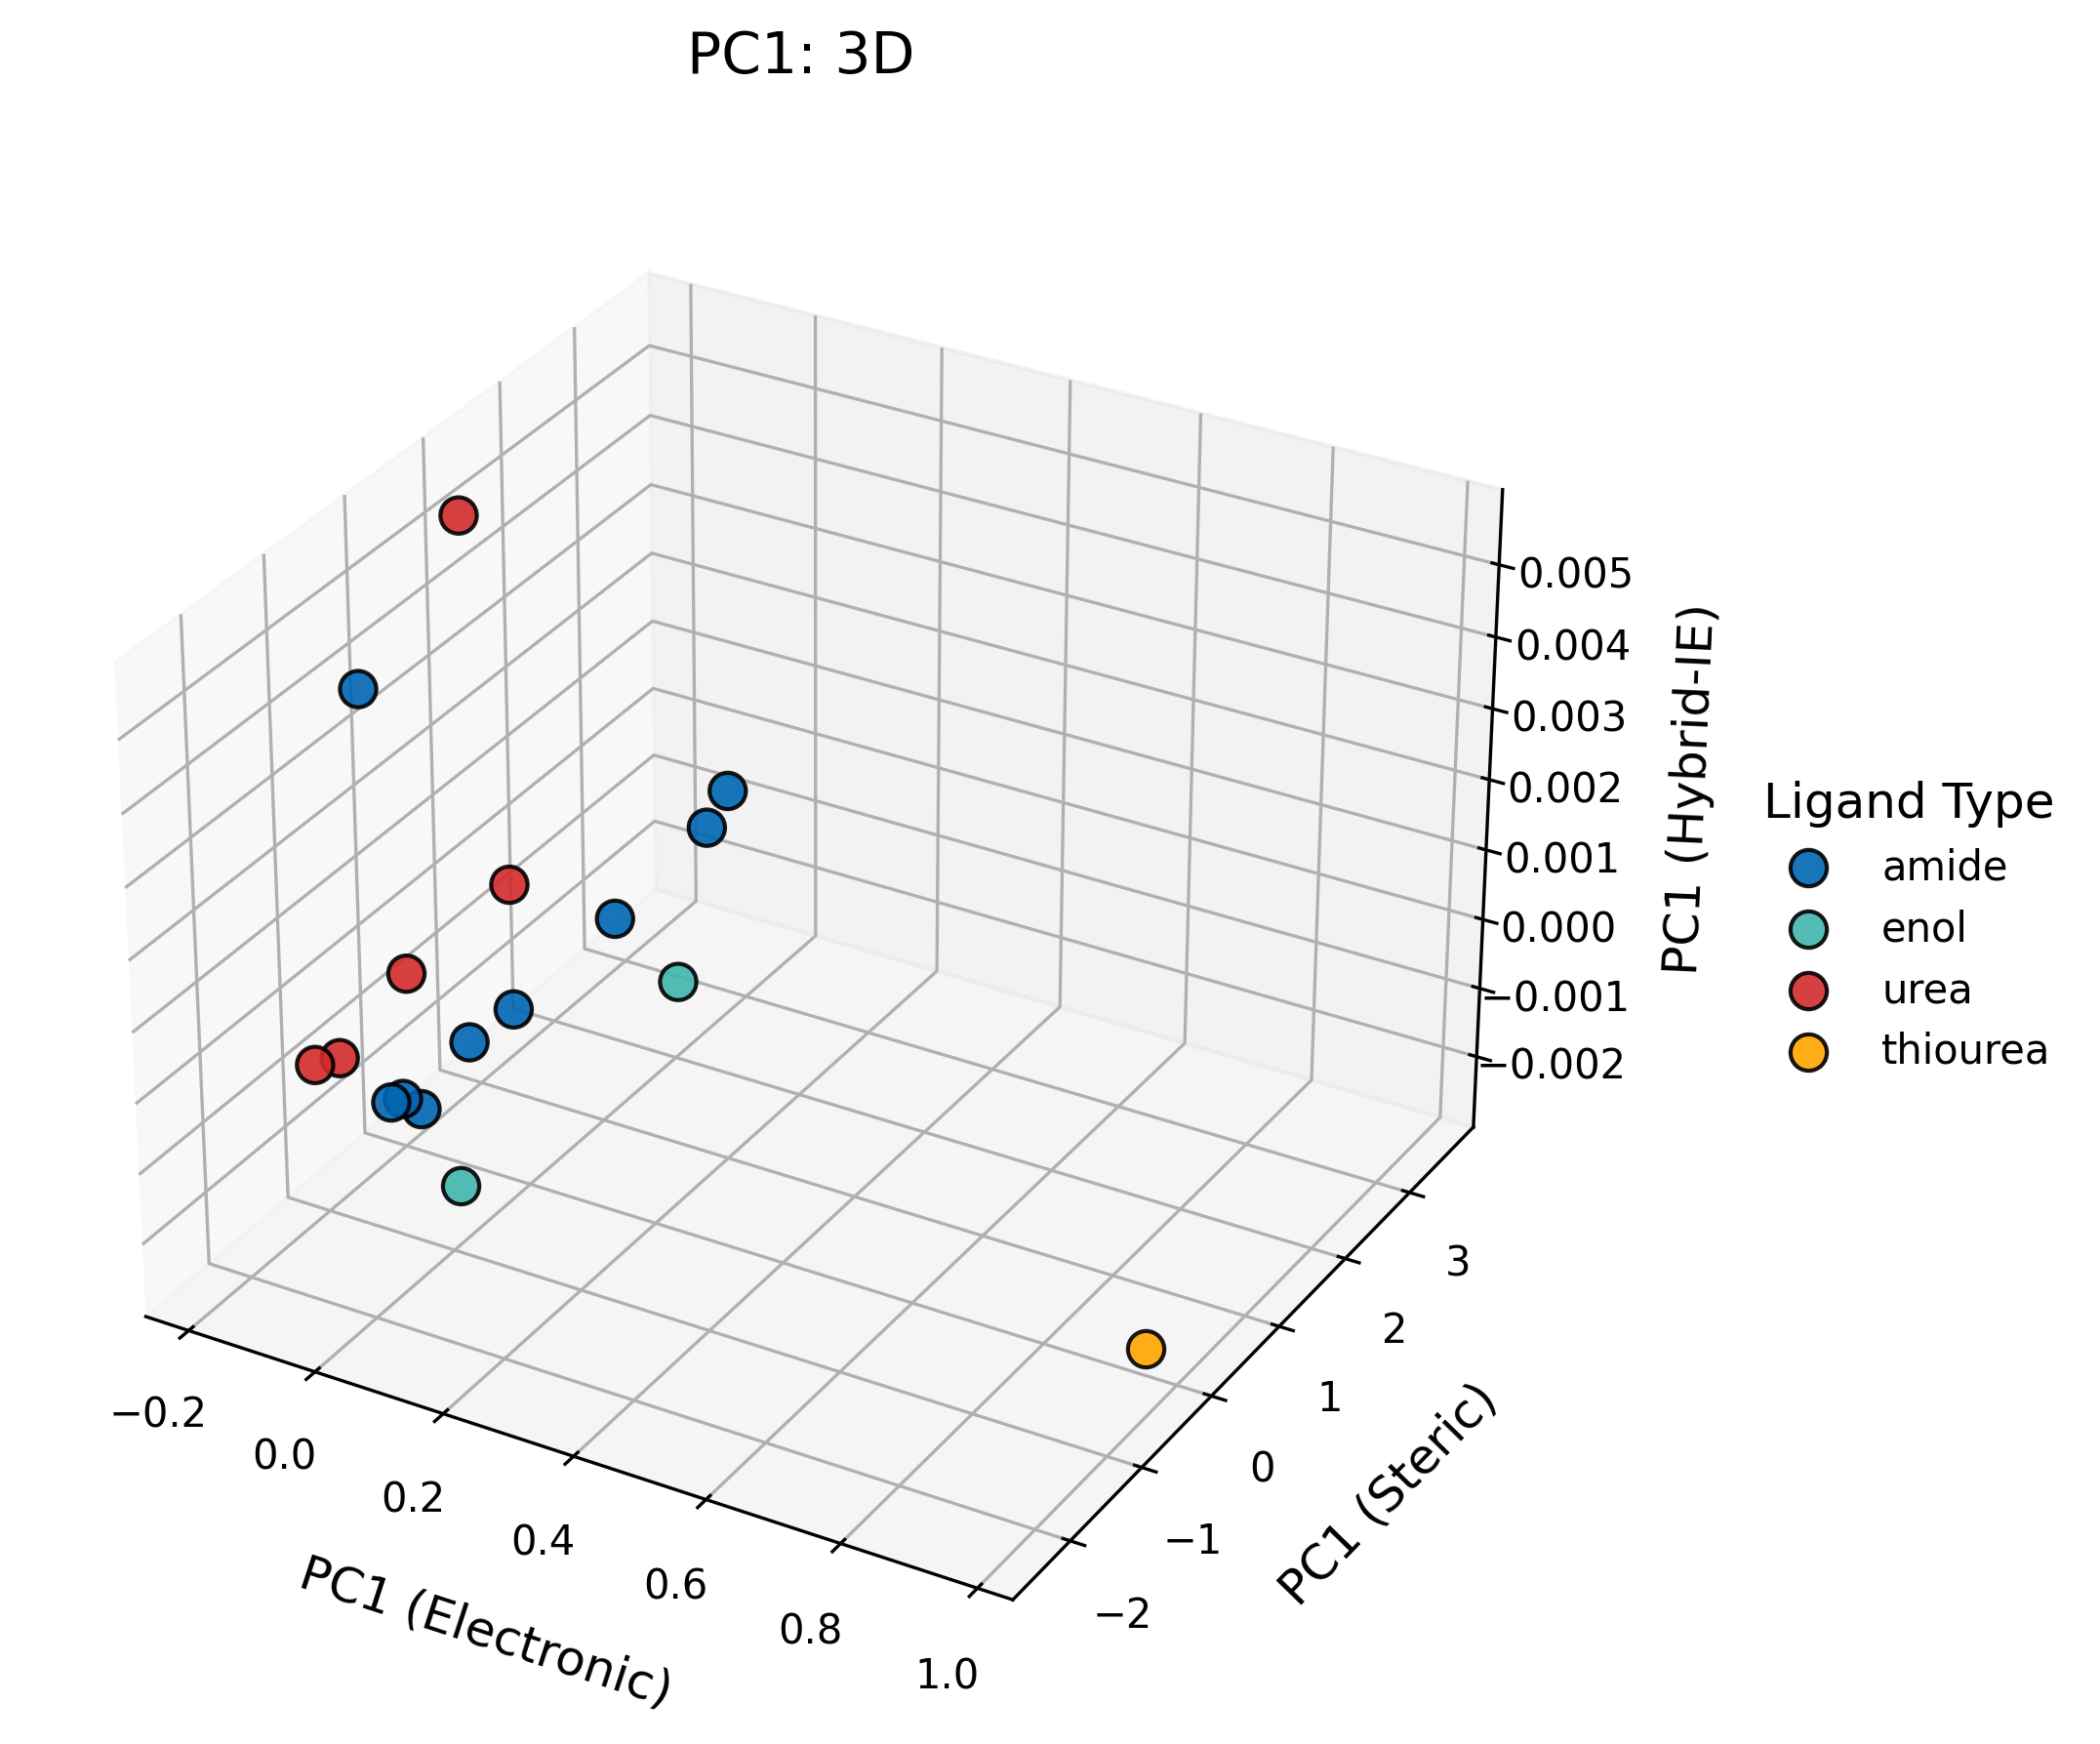

In [25]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 6), dpi=300)
ax = fig.add_subplot(111, projection='3d')

for lig_type, color in color_dict.items():
    type_indices = ligand_types == lig_type
    ax.scatter(
        pc1_electronic[type_indices], 
        pc1_steric[type_indices], 
        pc1_hybrid[type_indices], 
        label=lig_type,
        c=color, 
        marker='o', 
        s=80, 
        alpha=0.9, 
        edgecolors='black' 
    )

# Plot details
ax.set_xlabel('PC1 (Electronic)', fontsize=12, labelpad=10)
ax.set_ylabel('PC1 (Steric)', fontsize=12, labelpad=10)
ax.set_zlabel('PC1 (Hybrid-IE)', fontsize=12, labelpad=10)
ax.set_title('PC1: 3D (Electronic vs)', fontsize=14, pad=20)

ax.legend(
    title="Ligand Type", 
    fontsize=10, 
    title_fontsize=12, 
    loc='center left', 
    bbox_to_anchor=(1.1, 0.5), 
    frameon=False  
)

plt.tight_layout()
plt.show()